In [25]:
# print(pd. __version__)

In [26]:
# !pip install PySAL

In [27]:
import pandas as pd
import numpy as np
import urllib.request
import urllib
import geopandas as gpd
import urllib.request
import urllib
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot
# import seaborn as sns
# sns.set()

%matplotlib inline

# suppress warning
import warnings
warnings.filterwarnings('ignore')

import csv

# Spatial analysis of Uber Ridership

In [28]:
#import taxi zone shape file
taxi_zone = gpd.read_file('taxi_zones.shp')

In [29]:
#change the coordinate system
taxi_zone = taxi_zone.to_crs(epsg=4326)

In [30]:
#import uber ridership dataframe for 2019
uber_2019 = pd.read_csv('uber_2019_PB.csv')

In [31]:
uber_2019 = uber_2019.drop(columns=['Unnamed: 0'])

In [32]:
uber_2019.head()

hvfhs_license_num dispatching_base_num      pickup_datetime  \
0                 0               B02395  2019-01-01 00:15:25   
1                 0               B02395  2019-01-01 00:50:26   
2                 0               B02395  2019-01-01 00:51:20   
3                 0               B02395  2019-01-01 00:17:02   
4                 0               B02395  2019-01-01 00:28:24   

      dropoff_datetime  PULocationID  DOLocationID  SR_Flag  hour        date  \
0  2019-01-01 00:48:41          90.0          48.0      NaN     0  2019-01-01   
1  2019-01-01 01:16:07          48.0         144.0      1.0     0  2019-01-01   
2  2019-01-01 01:16:07          48.0         144.0      2.0     0  2019-01-01   
3  2019-01-01 00:23:34         112.0         112.0      NaN     0  2019-01-01   
4  2019-01-01 00:37:54         112.0         145.0      NaN     0  2019-01-01   

   year  DOW  
0  2019    1  
1  2019    1  
2  2019    1  
3  2019    1  
4  2019    1

In [33]:
uber_2019['dropoff_datetime'] = pd.to_datetime(uber_2019['dropoff_datetime'])
uber_2019['pickup_datetime'] = pd.to_datetime(uber_2019['pickup_datetime'])

In [34]:
uber_2019['PU_Month'] = uber_2019['pickup_datetime'].dt.month

In [35]:
uber_count = uber_2019.groupby(['PULocationID']).agg({'hour':'count'}).reset_index()
uber_count.rename(columns={'hour':'N_trips'}, inplace=True)

In [36]:
uber_count

PULocationID  N_trips
0             1.0      125
1             2.0      321
2             3.0   380359
3             4.0   685746
4             5.0    46114
..            ...      ...
258         261.0   661874
259         262.0   701634
260         263.0   958089
261         264.0       31
262         265.0     6534

[263 rows x 2 columns]

In [37]:
uber_count.isnull().any()

PULocationID    False
N_trips         False
dtype: bool

In [38]:
#merge the uber pick-up ridership data with taxi zone geopands dataframe
uber_zone_PU = taxi_zone.merge(uber_count, left_on = 'LocationID', right_on = 'PULocationID', how = 'inner')

In [39]:
uber_zone_PU

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0           1    0.116357    0.000782           Newark Airport           1   
1           2    0.433470    0.004866              Jamaica Bay           2   
2           3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3           4    0.043567    0.000112            Alphabet City           4   
4           5    0.092146    0.000498            Arden Heights           5   
..        ...         ...         ...                      ...         ...   
255       259    0.126750    0.000395       Woodlawn/Wakefield         259   
256       260    0.133514    0.000422                 Woodside         260   
257       261    0.027120    0.000034       World Trade Center         261   
258       262    0.049064    0.000122           Yorkville East         262   
259       263    0.037017    0.000066           Yorkville West         263   

           borough                                           geometry  \
0              EWR  POLYGON ((-74.18445 40.69500, -74.18449 40.695...   
1           Queens  MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...   
2            Bronx  POLYGON ((-73.84793 40.87134, -73.84725 40.870...   
3        Manhattan  POLYGON ((-73.97177 40.72582, -73.97179 40.725...   
4    Staten Island  POLYGON ((-74.17422 40.56257, -74.17349 40.562...   
..             ...                                                ...   
255          Bronx  POLYGON ((-73.85107 40.91037, -73.85207 40.909...   
256         Queens  POLYGON ((-73.90175 40.76078, -73.90147 40.759...   
257      Manhattan  POLYGON ((-74.01333 40.70503, -74.01327 40.704...   
258      Manhattan  MULTIPOLYGON (((-73.94383 40.78286, -73.94376 ...   
259      Manhattan  POLYGON ((-73.95219 40.77302, -73.95269 40.772...   

     PULocationID  N_trips  
0             1.0      125  
1             2.0      321  
2             3.0   380359  
3             4.0   685746  
4             5.0    46114  
..            ...      ...  
255         259.0   462882  
256         260.0   709376  
257         261.0   661874  
258         262.0   701634  
259         263.0   958089  

[260 rows x 9 columns]

In [40]:
uber_zone_PU.isnull().any()

OBJECTID        False
Shape_Leng      False
Shape_Area      False
zone            False
LocationID      False
borough         False
geometry        False
PULocationID    False
N_trips         False
dtype: bool

In [41]:
uber_count = uber_2019.groupby(['DOLocationID']).agg({'hour':'count'}).reset_index()
uber_count.rename(columns={'hour':'N_trips'}, inplace=True)

In [42]:
uber_zone_DO = taxi_zone.merge(uber_count, left_on = 'LocationID', right_on = 'DOLocationID', how = 'inner')

Text(0.5, 1.0, 'Unnormalized pick-up location map of Yellow Taxi, 2019')

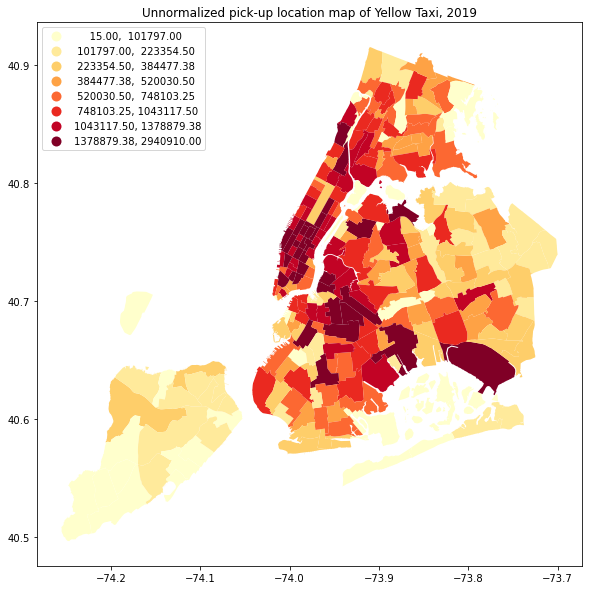

In [43]:
fig, ax = plt.subplots(1, figsize=(10,10))

uber_zone_PU.plot(ax=ax, column='N_trips', k=8, scheme='Quantiles', cmap = 'YlOrRd',legend=True, 
              legend_kwds={'loc': 'upper left'})
plt.title('Unnormalized pick-up location map of Yellow Taxi, 2019', fontsize = 12)

In [44]:
# fig, ax = plt.subplots(1, figsize=(10,10))

# uber_zone.plot(ax=ax, column='N_trips', k=25, scheme='Quantiles', legend=True, cmap='magma', edgecolor='white', linewidth=1, legend)
# plt.legend(loc="upper left")
# plt.title('Unnormalized pick-up location map of Uber Taxi, 2019', fontsize = 12)

<AxesSubplot:>

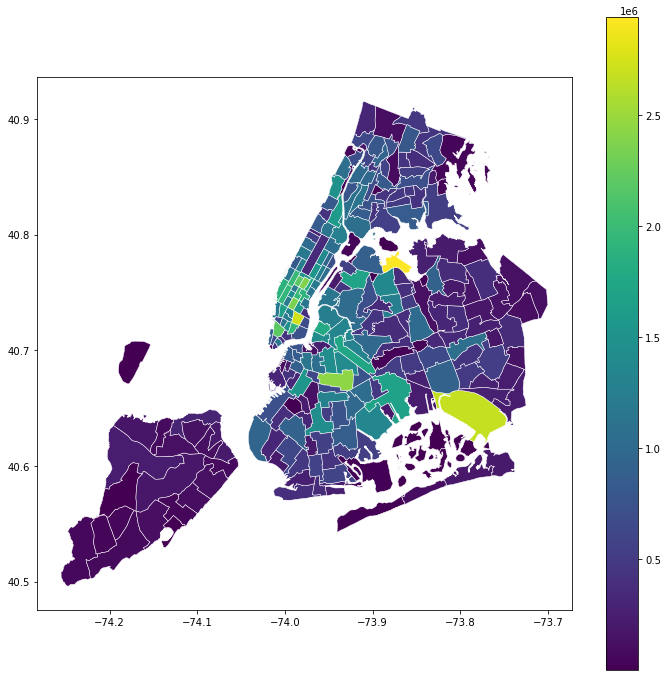

In [45]:
fig, ax = plt.subplots(figsize=(12,12))

uber_zone_PU.plot(ax=ax, column='N_trips',colormap='viridis',legend=True,figsize=(20,10), edgecolor='white', linewidth=0.5)
# poi_g.plot(ax=ax, marker='*', color = 'black',markersize=250, legend=True)

Ridership at Manhattan and JFK, Laguardia airports are too high as compared to other areas. This way those areas completely doninate the colormap. It would be visually more interpretable if we split the ridership in quantiles and assign colors to quantiles

<AxesSubplot:title={'center':'Drop_off distribution Map of Uber Taxi, 2019'}>

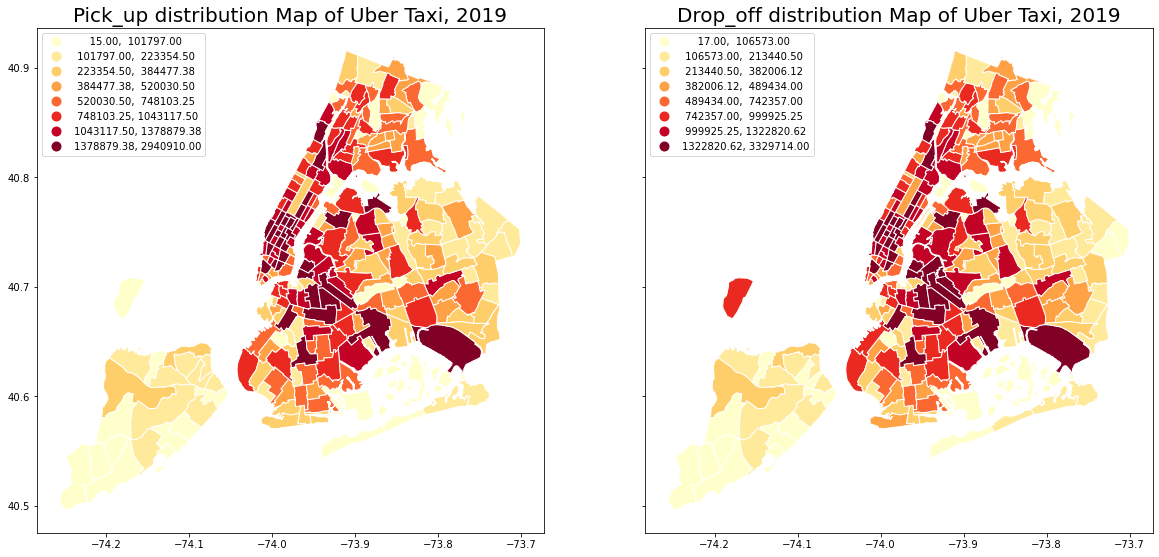

In [46]:
fig, (ax1, ax2) = pyplot.subplots(ncols=2, figsize = (20,10), sharex=True, sharey=True)
ax1.set_title('Pick_up distribution Map of Uber Taxi, 2019', fontsize = 20)
uber_zone_PU.plot(ax=ax1, column='N_trips', k=8, scheme='Quantiles', legend=True, cmap='YlOrRd',
                edgecolor='white', linewidth=1, legend_kwds={'loc': 'upper left'})
# poi_g.plot(ax=ax1, marker='*', color = 'black',markersize=100, legend=True)

ax2.set_title('Drop_off distribution Map of Uber Taxi, 2019', fontsize = 20)
uber_zone_DO.plot(ax=ax2, column='N_trips', k=8, scheme='Quantiles', legend=True, cmap='YlOrRd',
                edgecolor='white', linewidth=1, legend_kwds={'loc': 'upper left'})
# poi_g.plot(ax=ax2, marker='*', color = 'black',markersize=100, legend=True)

Right now taxi zones are all of different size, while the ridership heatmap is usually perceived as a density map. However the above quantity is affected by both - ridership density as well as the size of the zone which is somewhat arbitrary. Normalizing activity by the area (trips per sq. mile) or by population (trips per capita) would be more appropriate. However, we don't have population per taxi zone, we will be normalizing the ridership by the area.

In [47]:
uber_zone_PU['ActivityDensity'] = (uber_zone_PU['N_trips'] / uber_zone_PU['Shape_Area'])
uber_zone_DO['ActivityDensity'] = (uber_zone_DO['N_trips'] / uber_zone_DO['Shape_Area'])
uber_zone_PU['ActivityDensity'] = (uber_zone_PU['ActivityDensity'])/sum(uber_zone_PU['ActivityDensity'])
uber_zone_DO['ActivityDensity'] = (uber_zone_DO['ActivityDensity'])/sum(uber_zone_DO['ActivityDensity'])

<AxesSubplot:title={'center':'Drop_off density Map of Uber Taxi, 2019'}>

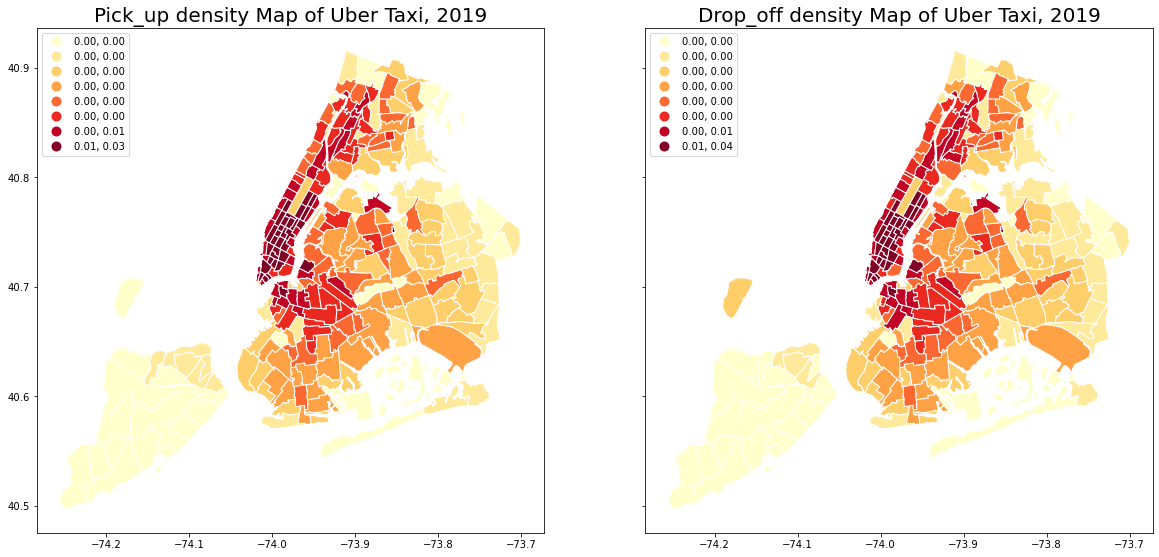

In [48]:
fig, (ax1, ax2) = pyplot.subplots(ncols=2, figsize = (20,10), sharex=True, sharey=True)
ax1.set_title('Pick_up density Map of Uber Taxi, 2019', fontsize = 20)
uber_zone_PU.plot(ax=ax1, column='ActivityDensity', k=8, scheme='Quantiles', legend=True, cmap='YlOrRd',
                edgecolor='white', linewidth=1, legend_kwds={'loc': 'upper left'})
# poi_g.plot(ax=ax1, marker='*', color = 'black',markersize=100, legend=True)

ax2.set_title('Drop_off density Map of Uber Taxi, 2019', fontsize = 20)
uber_zone_DO.plot(ax=ax2, column='ActivityDensity', k=8, scheme='Quantiles', legend=True, cmap='YlOrRd',
                edgecolor='white', linewidth=1, legend_kwds={'loc': 'upper left'})
# poi_g.plot(ax=ax2, marker='*', color = 'black',markersize=100, legend=True)

The pick-up density map and drop-off density maps almost looks the same however, the most stricking thing is EWR airport (taxi zone 1). The pick-up density at EWR airport is comparatively very low than the drop-off density. Hence, it would be interesting to see the actual ridership number for that taxi zones-1 (EWR airport), as this map assigns density color in comparison with the other tazi zone density and the range of it is different in the two maps.

In [49]:
uber_zone_PU[(uber_zone_PU.PULocationID == 1)]

OBJECTID  Shape_Leng  Shape_Area            zone  LocationID borough  \
0         1    0.116357    0.000782  Newark Airport           1     EWR   

                                            geometry  PULocationID  N_trips  \
0  POLYGON ((-74.18445 40.69500, -74.18449 40.695...           1.0      125   

   ActivityDensity  
0     1.220653e-07

In [50]:
uber_zone_DO[(uber_zone_DO.DOLocationID == 1)]

OBJECTID  Shape_Leng  Shape_Area            zone  LocationID borough  \
0         1    0.116357    0.000782  Newark Airport           1     EWR   

                                            geometry  DOLocationID  N_trips  \
0  POLYGON ((-74.18445 40.69500, -74.18449 40.695...           1.0   931247   

   ActivityDensity  
0         0.000973

The number of pick-up at EWR taxi zone is surprisingly low; only 125 rides in 2019. Lets investigate the PULocationID 1 little deeper to see why the ridership count is abnormal.

In [51]:
uber_2019['trip_duration'] = (uber_2019['dropoff_datetime'] - uber_2019['pickup_datetime'])
uber_2019['trip_duration'] = uber_2019['trip_duration'].dt.total_seconds()/60

In [52]:
uber_EWR_PU = uber_2019[(uber_2019.PULocationID == 1)]

In [53]:
uber_EWR_PU

hvfhs_license_num dispatching_base_num     pickup_datetime  \
12793845                  0               B02764 2019-01-28 20:14:43   
12793846                  0               B02764 2019-01-28 20:41:05   
12818375                  0               B02764 2019-01-28 21:03:21   
12920625                  0               B02764 2019-01-29 07:42:34   
12943265                  0               B02764 2019-01-29 08:11:32   
...                     ...                  ...                 ...   
164777698            HV0003               B02867 2019-12-04 15:02:39   
165593946            HV0003               B02765 2019-12-06 04:51:03   
168818909            HV0003               B02765 2019-12-11 21:28:29   
175338322            HV0003               B02889 2019-12-23 07:06:25   
176217367            HV0003               B02883 2019-12-25 06:44:14   

             dropoff_datetime  PULocationID  DOLocationID  SR_Flag  hour  \
12793845  2019-01-28 20:35:43           1.0           1.0      NaN    20   
12793846  2019-01-28 20:48:01           1.0           1.0      NaN    20   
12818375  2019-01-28 21:07:57           1.0           1.0      NaN    21   
12920625  2019-01-29 07:56:19           1.0           1.0      NaN     7   
12943265  2019-01-29 09:00:25           1.0           1.0      NaN     8   
...                       ...           ...           ...      ...   ...   
164777698 2019-12-04 15:04:46           1.0           1.0      NaN    15   
165593946 2019-12-06 04:53:06           1.0           1.0      NaN     4   
168818909 2019-12-11 21:29:25           1.0           1.0      NaN    21   
175338322 2019-12-23 07:07:21           1.0           1.0      NaN     7   
176217367 2019-12-25 06:49:30           1.0         265.0      NaN     6   

                 date  year  DOW  PU_Month  trip_duration  
12793845   2019-01-28  2019    0         1      21.000000  
12793846   2019-01-28  2019    0         1       6.933333  
12818375   2019-01-28  2019    0         1       4.600000  
12920625   2019-01-29  2019    1         1      13.750000  
12943265   2019-01-29  2019    1         1      48.883333  
...               ...   ...  ...       ...            ...  
164777698  2019-12-04  2019    2        12       2.116667  
165593946  2019-12-06  2019    4        12       2.050000  
168818909  2019-12-11  2019    2        12       0.933333  
175338322  2019-12-23  2019    0        12       0.933333  
176217367  2019-12-25  2019    2        12       5.266667  

[125 rows x 13 columns]

In [54]:
uber_EWR_PU.describe()

PULocationID  DOLocationID    SR_Flag        hour    year         DOW  \
count         125.0    125.000000  14.000000  125.000000   125.0  125.000000   
mean            1.0     12.008000   1.071429   11.880000  2019.0    2.552000   
std             0.0     49.249119   0.267261    6.507564     0.0    1.608726   
min             1.0      1.000000   1.000000    0.000000  2019.0    0.000000   
25%             1.0      1.000000   1.000000    7.000000  2019.0    1.000000   
50%             1.0      1.000000   1.000000    9.000000  2019.0    2.000000   
75%             1.0      1.000000   1.000000   18.000000  2019.0    4.000000   
max             1.0    265.000000   2.000000   23.000000  2019.0    6.000000   

         PU_Month  trip_duration  
count  125.000000     125.000000  
mean     3.640000      17.120000  
std      2.826716      12.934182  
min      1.000000       0.883333  
25%      2.000000       7.266667  
50%      3.000000      13.766667  
75%      3.000000      25.166667  
max     12.000000      60.533333

In [55]:
uber_EWR_PU_Month = uber_EWR_PU.groupby(['PU_Month']).agg({'hour':'count'}).reset_index()
uber_EWR_PU_Month.rename(columns={'hour':'N_Trips'}, inplace = True)

In [56]:
uber_EWR_PU_Month

PU_Month  N_Trips
0         1       19
1         2       20
2         3       55
3         4       11
4         5        1
5         6        5
6         8        1
7         9        2
8        11        6
9        12        5

Text(0.5, 1.0, 'Drop-off monthly distribution of EWR Pick-up rides')

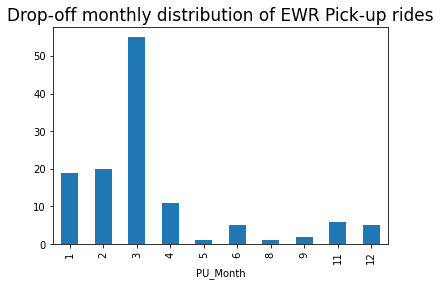

In [57]:
uber_EWR_PU_Month.plot.bar(x='PU_Month', y='N_Trips',legend = False)
plt.title('Drop-off monthly distribution of EWR Pick-up rides', fontsize=17)

In [58]:
uber_EWR_PUDO_dis = uber_EWR_PU.groupby(['PULocationID','DOLocationID']).agg({'hour':'count','trip_duration':'mean'})

In [59]:
uber_EWR_PUDO_dis = uber_EWR_PUDO_dis.reset_index()
uber_EWR_PUDO_dis.rename(columns={'hour':'N_trips'}, inplace=True)

In [60]:
uber_EWR_PUDO_dis

PULocationID  DOLocationID  N_trips  trip_duration
0           1.0           1.0      118      16.489972
1           1.0          33.0        1      60.533333
2           1.0         156.0        1      39.516667
3           1.0         161.0        1      27.266667
4           1.0         238.0        1      28.616667
5           1.0         265.0        3      12.750000

In [61]:
uber_EWR_PUDO_disg = taxi_zone.merge(uber_EWR_PUDO_dis, left_on = 'LocationID', right_on = 'DOLocationID', how = 'left')

In [62]:
uber_EWR_PUDO_disg

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0           1    0.116357    0.000782           Newark Airport           1   
1           2    0.433470    0.004866              Jamaica Bay           2   
2           3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3           4    0.043567    0.000112            Alphabet City           4   
4           5    0.092146    0.000498            Arden Heights           5   
..        ...         ...         ...                      ...         ...   
258       259    0.126750    0.000395       Woodlawn/Wakefield         259   
259       260    0.133514    0.000422                 Woodside         260   
260       261    0.027120    0.000034       World Trade Center         261   
261       262    0.049064    0.000122           Yorkville East         262   
262       263    0.037017    0.000066           Yorkville West         263   

           borough                                           geometry  \
0              EWR  POLYGON ((-74.18445 40.69500, -74.18449 40.695...   
1           Queens  MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...   
2            Bronx  POLYGON ((-73.84793 40.87134, -73.84725 40.870...   
3        Manhattan  POLYGON ((-73.97177 40.72582, -73.97179 40.725...   
4    Staten Island  POLYGON ((-74.17422 40.56257, -74.17349 40.562...   
..             ...                                                ...   
258          Bronx  POLYGON ((-73.85107 40.91037, -73.85207 40.909...   
259         Queens  POLYGON ((-73.90175 40.76078, -73.90147 40.759...   
260      Manhattan  POLYGON ((-74.01333 40.70503, -74.01327 40.704...   
261      Manhattan  MULTIPOLYGON (((-73.94383 40.78286, -73.94376 ...   
262      Manhattan  POLYGON ((-73.95219 40.77302, -73.95269 40.772...   

     PULocationID  DOLocationID  N_trips  trip_duration  
0             1.0           1.0    118.0      16.489972  
1             NaN           NaN      NaN            NaN  
2             NaN           NaN      NaN            NaN  
3             NaN           NaN      NaN            NaN  
4             NaN           NaN      NaN            NaN  
..            ...           ...      ...            ...  
258           NaN           NaN      NaN            NaN  
259           NaN           NaN      NaN            NaN  
260           NaN           NaN      NaN            NaN  
261           NaN           NaN      NaN            NaN  
262           NaN           NaN      NaN            NaN  

[263 rows x 11 columns]

In [63]:
uber_EWR_PUDO_disg = uber_EWR_PUDO_disg.fillna(0)

In [64]:
uber_EWR_PUDO_disg

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0           1    0.116357    0.000782           Newark Airport           1   
1           2    0.433470    0.004866              Jamaica Bay           2   
2           3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3           4    0.043567    0.000112            Alphabet City           4   
4           5    0.092146    0.000498            Arden Heights           5   
..        ...         ...         ...                      ...         ...   
258       259    0.126750    0.000395       Woodlawn/Wakefield         259   
259       260    0.133514    0.000422                 Woodside         260   
260       261    0.027120    0.000034       World Trade Center         261   
261       262    0.049064    0.000122           Yorkville East         262   
262       263    0.037017    0.000066           Yorkville West         263   

           borough                                           geometry  \
0              EWR  POLYGON ((-74.18445 40.69500, -74.18449 40.695...   
1           Queens  MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...   
2            Bronx  POLYGON ((-73.84793 40.87134, -73.84725 40.870...   
3        Manhattan  POLYGON ((-73.97177 40.72582, -73.97179 40.725...   
4    Staten Island  POLYGON ((-74.17422 40.56257, -74.17349 40.562...   
..             ...                                                ...   
258          Bronx  POLYGON ((-73.85107 40.91037, -73.85207 40.909...   
259         Queens  POLYGON ((-73.90175 40.76078, -73.90147 40.759...   
260      Manhattan  POLYGON ((-74.01333 40.70503, -74.01327 40.704...   
261      Manhattan  MULTIPOLYGON (((-73.94383 40.78286, -73.94376 ...   
262      Manhattan  POLYGON ((-73.95219 40.77302, -73.95269 40.772...   

     PULocationID  DOLocationID  N_trips  trip_duration  
0             1.0           1.0    118.0      16.489972  
1             0.0           0.0      0.0       0.000000  
2             0.0           0.0      0.0       0.000000  
3             0.0           0.0      0.0       0.000000  
4             0.0           0.0      0.0       0.000000  
..            ...           ...      ...            ...  
258           0.0           0.0      0.0       0.000000  
259           0.0           0.0      0.0       0.000000  
260           0.0           0.0      0.0       0.000000  
261           0.0           0.0      0.0       0.000000  
262           0.0           0.0      0.0       0.000000  

[263 rows x 11 columns]

Text(0.5, 1.0, 'Drop off location of uber rides with EWR as origin, 2019')

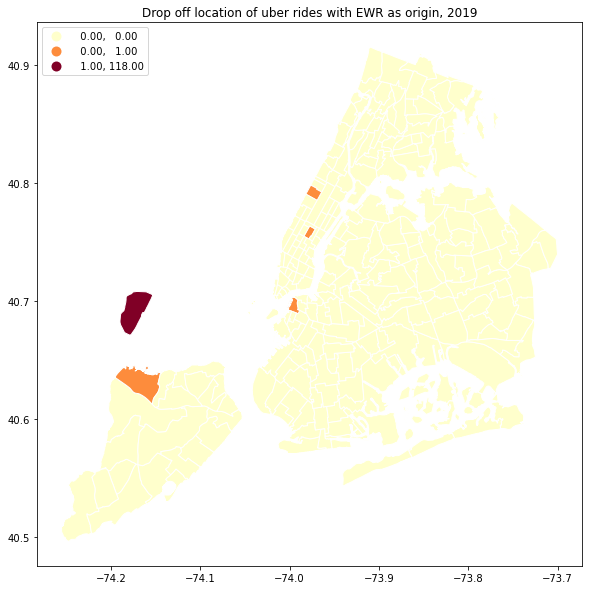

In [65]:
fig, ax = plt.subplots(1, figsize=(10,10)) 

uber_EWR_PUDO_disg.plot(ax=ax, column='N_trips', k=200, scheme='Quantiles', legend=True, cmap='YlOrRd',
                edgecolor='white', linewidth=1, legend_kwds={'loc': 'upper left'})
plt.title('Drop off location of uber rides with EWR as origin, 2019', fontsize = 12)

Taxi Zone 265 is unknown. Other than EWR itself, the taxi's travel to mid town manhattan, downtown brooklyn and nearest taxi zone of SI

In [66]:
uber_EWR_dow = uber_EWR_PU.groupby(['DOLocationID','DOW']).agg({'hour':'count'})
uber_EWR_dow.rename(columns = {'hour':'N_trips'}, inplace = True)

In [67]:
uber_EWR_dow

N_trips
DOLocationID DOW         
1.0          0          6
             1         34
             2         25
             3         20
             4         21
             5          2
             6         10
33.0         1          1
156.0        2          1
161.0        4          1
238.0        4          1
265.0        2          1
             3          1
             5          1

In [68]:
uber_EWR_dow = uber_EWR_dow.reset_index()

Text(0.5, 1.0, 'Weekly trip distribution of uber rides originating from EWR')

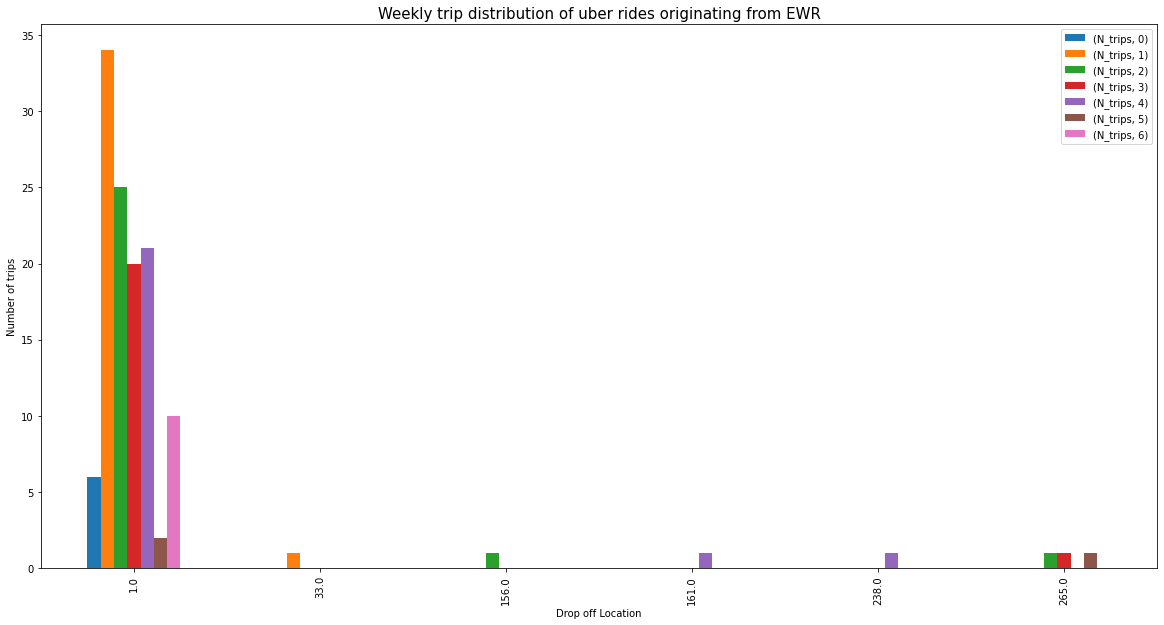

In [69]:
fig, ax = plt.subplots(1, figsize=(20,10)) 
uber_EWR_dow.pivot(index=['DOLocationID'], columns=['DOW'], values = ['N_trips']).plot(ax=ax, kind='bar')

plt.xlabel('Drop off Location')
plt.ylabel('Number of trips')
plt.legend(loc = 'upper right')
plt.title ('Weekly trip distribution of uber rides originating from EWR', fontsize = 15)

DOW 0= Monday and 6= Sunday
Majority trips are in the weekdays

In [70]:
uber_EWR_hour = uber_EWR_PU.groupby(['hour']).agg({'DOW':'count'})
uber_EWR_hour.rename(columns = {'DOW':'N_trips'}, inplace = True)

In [71]:
uber_EWR_hour = uber_EWR_hour.reset_index()

In [72]:
uber_EWR_hour

hour  N_trips
0      0        1
1      1        3
2      2        1
3      3        4
4      4        2
5      5        5
6      6        9
7      7       13
8      8       17
9      9       10
10    10        5
11    11        1
12    12        4
13    13        1
14    14        4
15    15        3
16    17        5
17    18        7
18    19        8
19    20        4
20    21        3
21    22       10
22    23        5

Text(0.5, 1.0, 'Drop-off hourly distribution of EWR Pick-up rides')

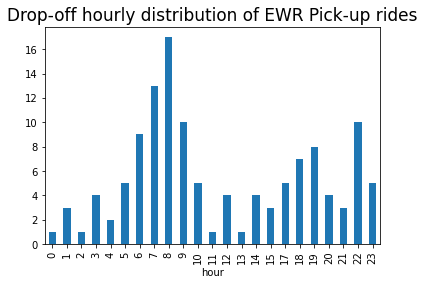

In [73]:
uber_EWR_hour.plot.bar(x='hour', y='N_trips',legend = False)
plt.title('Drop-off hourly distribution of EWR Pick-up rides', fontsize=17)

May be NJ registered uber cabs pick up from EWR and hence they are not accounted into this NYC TLC dataset

In [74]:
uber_EWR_DO = uber_2019[(uber_2019.DOLocationID == 1)]

In [75]:
uber_EWR_DO

hvfhs_license_num dispatching_base_num     pickup_datetime  \
4063                      0               B02764 2019-01-01 00:39:54   
7627                      0               B02764 2019-01-01 00:47:48   
13809                     0               B02864 2019-01-01 00:48:36   
18748                     0               B02869 2019-01-01 00:55:14   
18894                     0               B02869 2019-01-01 00:40:16   
...                     ...                  ...                 ...   
179148256            HV0003               B02882 2019-12-31 23:36:34   
179149665            HV0003               B02835 2019-12-31 23:16:56   
179162154            HV0003               B02764 2019-12-31 23:51:43   
179165803            HV0003               B02875 2019-12-31 23:34:04   
179166751            HV0003               B02866 2019-12-31 23:23:23   

             dropoff_datetime  PULocationID  DOLocationID  SR_Flag  hour  \
4063      2019-01-01 01:41:52         161.0           1.0      NaN     0   
7627      2019-01-01 02:07:42         161.0           1.0      NaN     0   
13809     2019-01-01 01:23:24          48.0           1.0      NaN     0   
18748     2019-01-01 01:41:05          68.0           1.0      NaN     0   
18894     2019-01-01 01:39:40         100.0           1.0      NaN     0   
...                       ...           ...           ...      ...   ...   
179148256 2019-12-31 23:57:49         206.0           1.0      NaN    23   
179149665 2019-12-31 23:38:30          68.0           1.0      NaN    23   
179162154 2020-01-01 00:19:33         100.0           1.0      NaN    23   
179165803 2020-01-01 00:10:35          97.0           1.0      NaN    23   
179166751 2019-12-31 23:50:49         186.0           1.0      NaN    23   

                 date  year  DOW  PU_Month  trip_duration  
4063       2019-01-01  2019    1         1      61.966667  
7627       2019-01-01  2019    1         1      79.900000  
13809      2019-01-01  2019    1         1      34.800000  
18748      2019-01-01  2019    1         1      45.850000  
18894      2019-01-01  2019    1         1      59.400000  
...               ...   ...  ...       ...            ...  
179148256  2019-12-31  2019    1        12      21.250000  
179149665  2019-12-31  2019    1        12      21.566667  
179162154  2019-12-31  2019    1        12      27.833333  
179165803  2019-12-31  2019    1        12      36.516667  
179166751  2019-12-31  2019    1        12      27.433333  

[931247 rows x 13 columns]

In [76]:
uber_EWR_DOPU_dis = uber_EWR_DO.groupby(['DOLocationID','PULocationID']).agg({'hour':'count','trip_duration':'mean'}).reset_index()

In [77]:
uber_EWR_DOPU_dis.rename(columns={'hour':'N_trips'}, inplace=True)

In [78]:
uber_EWR_DOPU_dis

DOLocationID  PULocationID  N_trips  trip_duration
0             1.0           1.0      118      16.489972
1             1.0           2.0        1      52.666667
2             1.0           3.0       99      58.032492
3             1.0           4.0     3076      41.465025
4             1.0           5.0      867      26.639889
..            ...           ...      ...            ...
255           1.0         260.0      309      58.030744
256           1.0         261.0    16962      41.287218
257           1.0         262.0     3783      49.487787
258           1.0         263.0     5832      50.408365
259           1.0         265.0       39      21.429487

[260 rows x 4 columns]

In [79]:
uber_EWR_DOPU_dis = taxi_zone.merge(uber_EWR_DOPU_dis, left_on = 'LocationID', right_on = 'PULocationID', how = 'left')

In [80]:
uber_EWR_DOPU_dis = uber_EWR_DOPU_dis.fillna(0)

Text(0.5, 1.0, 'Pick up location of uber rides with EWR as destination, 2019')

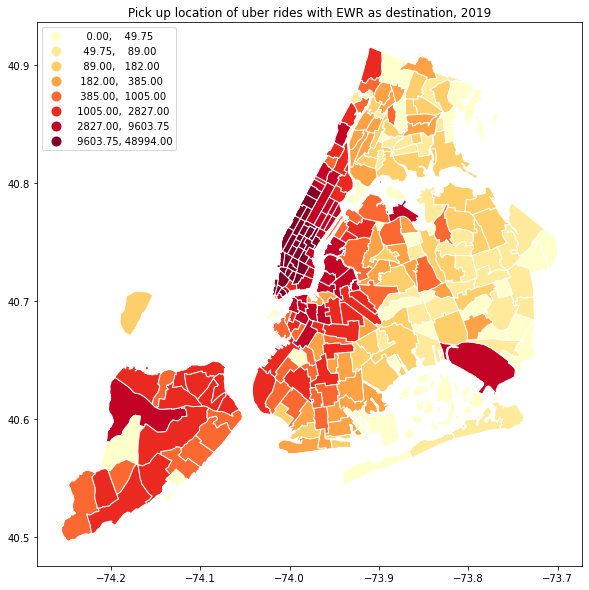

In [81]:
fig, ax = plt.subplots(1, figsize=(10,10)) 

uber_EWR_DOPU_dis.plot(ax=ax, column='N_trips', k=8, scheme='Quantiles', legend=True, cmap='YlOrRd',
                edgecolor='white', linewidth=1, legend_kwds={'loc': 'upper left'})
plt.title('Pick up location of uber rides with EWR as destination, 2019', fontsize = 12)

https://gridwise.io/blog/new-jersey/uber-and-lyft-driver-instructions-for-newark-liberty-international-airport-ewr/

Lyft drivers, please note: if you’re a driver whose home region is New Jersey, you will not be able to receive ride requests in New York City. If a rider brought you to the city, you’ll have to return to New Jersey to get another ride request. If your home region is New York City but you’ve ended up in New Jersey, your next request will be headed back to the city. 

In [ ]:
# uber_PU1 = uber_PU1[(uber_PU1.PULocationID == 1)]
# uber_PU1.rename(columns={'DOLocationID':'drop-off location ID'}, inplace=True)

In [ ]:
# uber_PU1['hour'] = uber_PU1['hour']/uber_PU1['hour'].sum()

In [ ]:
# uber_PU1.plot.bar(x='drop-off location ID', y='hour',legend = False)
# plt.title('Drop-off location distribution of EWR Pick-up rides', fontsize=17)

This shows that, Pick-up location 1 has more than 90% of the drop-off locations within the same taxi zone. It is very surprising, as the taxi zone 1 includes EWR airport and expecting so low ridership with extremely short distance travel is unusual.
The spatial comparison of pick-up and drop-off ridership distribution maps was useful representation in identifying unusual locations with unexpected ridership count along with broad understanding of the ridership pattern in the city.

### JFK

In [82]:
uber_JFK_PU = uber_2019[(uber_2019.PULocationID == 132)]

In [83]:
uber_JFK_PU

hvfhs_license_num dispatching_base_num     pickup_datetime  \
130                       0               B02395 2019-01-01 00:17:50   
237                       0               B02395 2019-01-01 00:11:26   
263                       0               B02395 2019-01-01 00:15:20   
395                       0               B02395 2019-01-01 00:24:25   
1062                      0               B02617 2019-01-01 00:30:00   
...                     ...                  ...                 ...   
179169606            HV0003               B02877 2019-12-31 23:46:51   
179169618            HV0003               B02764 2019-12-31 23:07:44   
179169619            HV0003               B02764 2019-12-31 23:33:48   
179169738            HV0003               B02866 2019-12-31 23:09:25   
179169742            HV0003               B02835 2019-12-31 23:04:11   

             dropoff_datetime  PULocationID  DOLocationID  SR_Flag  hour  \
130       2019-01-01 01:36:38         132.0         265.0      NaN     0   
237       2019-01-01 00:59:52         132.0          90.0      NaN     0   
263       2019-01-01 01:12:51         132.0         265.0      NaN     0   
395       2019-01-01 01:03:34         132.0         265.0      NaN     0   
1062      2019-01-01 00:48:29         132.0         191.0      NaN     0   
...                       ...           ...           ...      ...   ...   
179169606 2020-01-01 00:14:31         132.0         124.0      NaN    23   
179169618 2019-12-31 23:20:40         132.0         218.0      NaN    23   
179169619 2019-12-31 23:45:17         132.0         216.0      NaN    23   
179169738 2019-12-31 23:38:12         132.0          61.0      1.0    23   
179169742 2019-12-31 23:12:35         132.0         216.0      NaN    23   

                 date  year  DOW  PU_Month  trip_duration  
130        2019-01-01  2019    1         1      78.800000  
237        2019-01-01  2019    1         1      48.433333  
263        2019-01-01  2019    1         1      57.516667  
395        2019-01-01  2019    1         1      39.150000  
1062       2019-01-01  2019    1         1      18.483333  
...               ...   ...  ...       ...            ...  
179169606  2019-12-31  2019    1        12      27.666667  
179169618  2019-12-31  2019    1        12      12.933333  
179169619  2019-12-31  2019    1        12      11.483333  
179169738  2019-12-31  2019    1        12      28.783333  
179169742  2019-12-31  2019    1        12       8.400000  

[2679498 rows x 13 columns]

In [84]:
uber_JFK_PU.describe()

PULocationID  DOLocationID       SR_Flag          hour       year  \
count     2679498.0  2.679498e+06  92068.000000  2.679498e+06  2679498.0   
mean          132.0  1.655011e+02      1.136975  1.377673e+01     2019.0   
std             0.0  8.270146e+01      0.525761  6.963226e+00        0.0   
min           132.0  1.000000e+00      1.000000  0.000000e+00     2019.0   
25%           132.0  9.100000e+01      1.000000  8.000000e+00     2019.0   
50%           132.0  1.640000e+02      1.000000  1.500000e+01     2019.0   
75%           132.0  2.460000e+02      1.000000  2.000000e+01     2019.0   
max           132.0  2.650000e+02     28.000000  2.300000e+01     2019.0   

                DOW      PU_Month  trip_duration  
count  2.679498e+06  2.679498e+06   2.679498e+06  
mean   2.981193e+00  6.528569e+00   4.208619e+01  
std    2.061406e+00  3.424776e+00   2.185347e+01  
min    0.000000e+00  1.000000e+00  -5.056667e+01  
25%    1.000000e+00  4.000000e+00   2.773333e+01  
50%    3.000000e+00  6.000000e+00   3.916667e+01  
75%    5.000000e+00  9.000000e+00   5.385000e+01  
max    6.000000e+00  1.200000e+01   9.614833e+02

In [85]:
uber_jfk_PU_Month = uber_JFK_PU.groupby(['PU_Month']).agg({'hour':'count'}).reset_index()
uber_jfk_PU_Month.rename(columns={'hour':'N_Trips'}, inplace = True)

In [86]:
uber_jfk_PU_Month

PU_Month  N_Trips
0          1   219066
1          2   184177
2          3   246993
3          4   232183
4          5   248874
5          6   210310
6          7   206053
7          8   233535
8          9   230664
9         10   226955
10        11   214506
11        12   226182

Text(0.5, 1.0, 'Drop-off monthly distribution of JFK Pick-up rides')

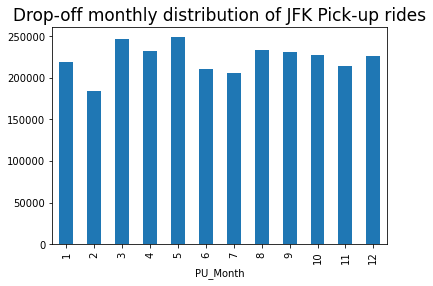

In [87]:
uber_jfk_PU_Month.plot.bar(x='PU_Month', y='N_Trips',legend = False)
plt.title('Drop-off monthly distribution of JFK Pick-up rides', fontsize=17)

In [88]:
uber_JFK_PUDO_dis = uber_JFK_PU.groupby(['PULocationID','DOLocationID']).agg({'hour':'count','trip_duration':'mean'}).reset_index()

In [89]:
uber_JFK_PUDO_dis.rename(columns={'hour':'N_trips'}, inplace=True)

In [90]:
uber_JFK_PUDO_dis = taxi_zone.merge(uber_JFK_PUDO_dis, left_on = 'LocationID', right_on = 'DOLocationID', how = 'left')

In [91]:
uber_JFK_PUDO_dis = uber_JFK_PUDO_dis.fillna(0)

In [92]:
uber_JFK_PUDO_dis

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0           1    0.116357    0.000782           Newark Airport           1   
1           2    0.433470    0.004866              Jamaica Bay           2   
2           3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3           4    0.043567    0.000112            Alphabet City           4   
4           5    0.092146    0.000498            Arden Heights           5   
..        ...         ...         ...                      ...         ...   
258       259    0.126750    0.000395       Woodlawn/Wakefield         259   
259       260    0.133514    0.000422                 Woodside         260   
260       261    0.027120    0.000034       World Trade Center         261   
261       262    0.049064    0.000122           Yorkville East         262   
262       263    0.037017    0.000066           Yorkville West         263   

           borough                                           geometry  \
0              EWR  POLYGON ((-74.18445 40.69500, -74.18449 40.695...   
1           Queens  MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...   
2            Bronx  POLYGON ((-73.84793 40.87134, -73.84725 40.870...   
3        Manhattan  POLYGON ((-73.97177 40.72582, -73.97179 40.725...   
4    Staten Island  POLYGON ((-74.17422 40.56257, -74.17349 40.562...   
..             ...                                                ...   
258          Bronx  POLYGON ((-73.85107 40.91037, -73.85207 40.909...   
259         Queens  POLYGON ((-73.90175 40.76078, -73.90147 40.759...   
260      Manhattan  POLYGON ((-74.01333 40.70503, -74.01327 40.704...   
261      Manhattan  MULTIPOLYGON (((-73.94383 40.78286, -73.94376 ...   
262      Manhattan  POLYGON ((-73.95219 40.77302, -73.95269 40.772...   

     PULocationID  DOLocationID  N_trips  trip_duration  
0           132.0           1.0   3942.0      67.510752  
1           132.0           2.0     21.0      25.610317  
2           132.0           3.0   1655.0      40.143746  
3           132.0           4.0   6651.0      46.558871  
4           132.0           5.0    230.0      60.708478  
..            ...           ...      ...            ...  
258         132.0         259.0   2421.0      46.206664  
259         132.0         260.0   4370.0      32.704714  
260         132.0         261.0  13014.0      54.164861  
261         132.0         262.0  10685.0      43.381019  
262         132.0         263.0  16167.0      43.662033  

[263 rows x 11 columns]

Text(0.5, 1.0, 'Drop off  location of uber rides with JFK as origin, 2019')

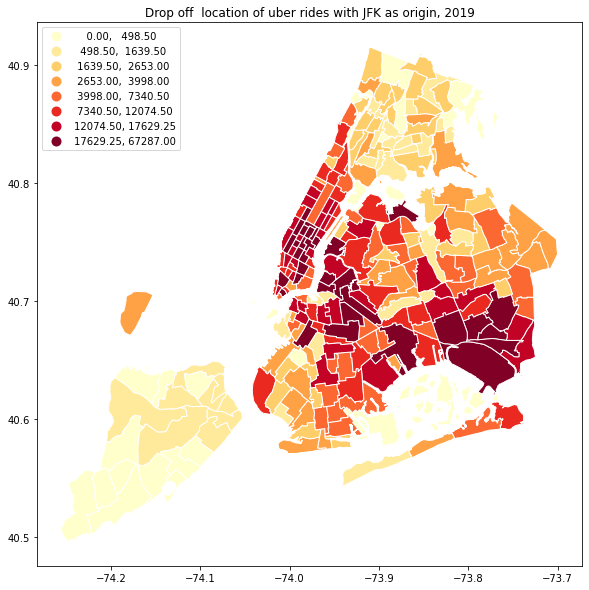

In [93]:
fig, ax = plt.subplots(1, figsize=(10,10)) 

uber_JFK_PUDO_dis.plot(ax=ax, column='N_trips', k=8, scheme='Quantiles', legend=True, cmap='YlOrRd',
                edgecolor='white', linewidth=1, legend_kwds={'loc': 'upper left'})
plt.title('Drop off  location of uber rides with JFK as origin, 2019', fontsize = 12)

In [94]:
uber_JFK_PU_hour = uber_JFK_PU.groupby(['hour']).agg({'DOLocationID':'count'}).reset_index()
uber_JFK_PU_hour.rename(columns = {'DOLocationID':'N_trips'}, inplace = True)

In [95]:
uber_JFK_PU_hour

hour  N_trips
0      0   161348
1      1    95976
2      2    35989
3      3    21304
4      4    23559
5      5    70262
6      6    90656
7      7    91774
8      8    82876
9      9    73446
10    10    82742
11    11    70855
12    12    88495
13    13   115444
14    14   141575
15    15   146208
16    16   139400
17    17   142009
18    18   144343
19    19   141172
20    20   183258
21    21   189579
22    22   175342
23    23   171886

Text(0.5, 1.0, 'Drop-off hourly distribution of JFK Pick-up rides')

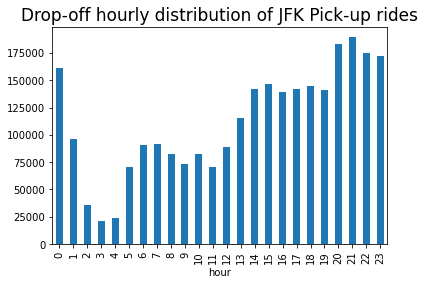

In [96]:
uber_JFK_PU_hour.plot.bar(x='hour', y='N_trips',legend = False)
plt.title('Drop-off hourly distribution of JFK Pick-up rides', fontsize=17)

In [97]:
uber_jfk_DO = uber_2019[(uber_2019.DOLocationID == 132)]

In [98]:
uber_jfk_DOPU_dis = uber_jfk_DO.groupby(['DOLocationID','PULocationID']).agg({'hour':'count','trip_duration':'mean'}).reset_index()

In [99]:
uber_jfk_DOPU_dis.rename(columns={'hour':'N_trips'}, inplace=True)

In [100]:
uber_jfk_DOPU_dis = taxi_zone.merge(uber_jfk_DOPU_dis, left_on = 'LocationID', right_on = 'PULocationID', how = 'left')

In [101]:
uber_jfk_DOPU_dis = uber_jfk_DOPU_dis.fillna(0)

Text(0.5, 1.0, 'Pick up location of uber rides with JFK as destination, 2019')

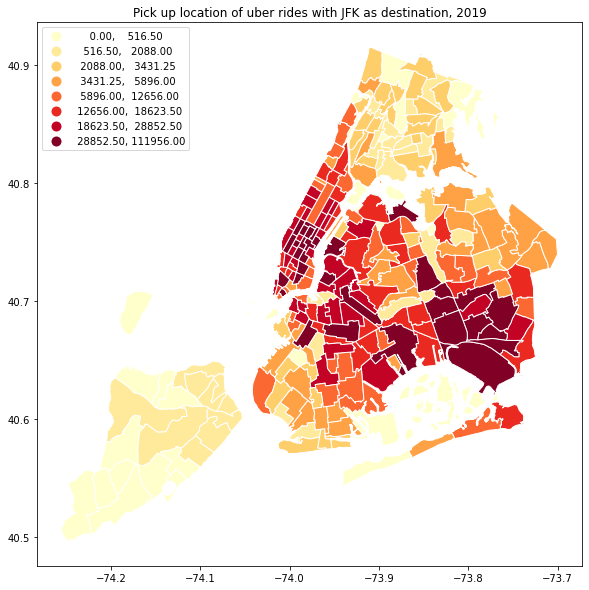

In [102]:
fig, ax = plt.subplots(1, figsize=(10,10)) 

uber_jfk_DOPU_dis.plot(ax=ax, column='N_trips', k=8, scheme='Quantiles', legend=True, cmap='YlOrRd',
                edgecolor='white', linewidth=1, legend_kwds={'loc': 'upper left'})
plt.title('Pick up location of uber rides with JFK as destination, 2019', fontsize = 12)

# Spatial analysis of Yellow Taxi Ridership

In [103]:
yellow_2019 = pd.read_csv('taxi_2019.csv')

In [104]:
yellow_2019

Unnamed: 0.1  Unnamed: 0 tpep_pickup_datetime tpep_dropoff_datetime  \
0                    0           0  2019-01-01 00:46:40   2019-01-01 00:53:20   
1                    1           1  2019-01-01 00:59:47   2019-01-01 01:18:59   
2                    2           7  2019-01-01 00:21:28   2019-01-01 00:28:37   
3                    3           8  2019-01-01 00:32:01   2019-01-01 00:45:39   
4                    4           9  2019-01-01 00:57:32   2019-01-01 01:09:32   
...                ...         ...                  ...                   ...   
84397572      84397572      770856  2019-12-31 00:07:00   2019-12-31 00:46:00   
84397573      84397573      770857  2019-12-31 00:20:00   2019-12-31 00:47:00   
84397574      84397574      770858  2019-12-31 00:50:00   2019-12-31 01:21:00   
84397575      84397575      770859  2019-12-31 00:38:19   2019-12-31 01:19:37   
84397576      84397576      770860  2019-12-31 00:21:00   2019-12-31 00:56:00   

          passenger_count  trip_distance  PULocationID  DOLocationID  \
0                     1.0           1.50         151.0         239.0   
1                     1.0           2.60         239.0         246.0   
2                     1.0           1.30         163.0         229.0   
3                     1.0           3.70         229.0           7.0   
4                     2.0           2.10         141.0         234.0   
...                   ...            ...           ...           ...   
84397572              NaN          12.78         230.0          72.0   
84397573              NaN          18.52         219.0          32.0   
84397574              NaN          13.13         161.0          76.0   
84397575              NaN          14.51         230.0          21.0   
84397576              NaN         -17.16         193.0         219.0   

          total_amount  hour        date    year  DOW  lpep_pickup_datetime  \
0                 9.95   0.0  2019-01-01  2019.0  1.0                   NaN   
1                16.30   0.0  2019-01-01  2019.0  1.0                   NaN   
2                 9.05   0.0  2019-01-01  2019.0  1.0                   NaN   
3                18.50   0.0  2019-01-01  2019.0  1.0                   NaN   
4                13.00   0.0  2019-01-01  2019.0  1.0                   NaN   
...                ...   ...         ...     ...  ...                   ...   
84397572         41.99   0.0  2019-12-31  2019.0  1.0                   NaN   
84397573         61.30   0.0  2019-12-31  2019.0  1.0                   NaN   
84397574         47.69   0.0  2019-12-31  2019.0  1.0                   NaN   
84397575         51.03   0.0  2019-12-31  2019.0  1.0                   NaN   
84397576         48.17   0.0  2019-12-31  2019.0  1.0                   NaN   

          lpep_dropoff_datetime  
0                           NaN  
1                           NaN  
2                           NaN  
3                           NaN  
4                           NaN  
...                         ...  
84397572                    NaN  
84397573                    NaN  
84397574                    NaN  
84397575                    NaN  
84397576                    NaN  

[84397577 rows x 15 columns]

In [105]:
yellow_2019 = yellow_2019.drop(columns=['Unnamed: 0','Unnamed: 0.1'])

In [106]:
yellow_2019['tpep_dropoff_datetime'] = pd.to_datetime(yellow_2019['tpep_dropoff_datetime'])
yellow_2019['tpep_pickup_datetime'] = pd.to_datetime(yellow_2019['tpep_pickup_datetime'])

In [107]:
yellow_2019['PU_Month'] = yellow_2019['tpep_pickup_datetime'].dt.month

In [108]:
green_2019 = pd.read_csv('green_taxi_all.csv')

In [109]:
yellow_2019['trip_duration'] = (yellow_2019['tpep_dropoff_datetime'] - yellow_2019['tpep_pickup_datetime'])
yellow_2019['trip_duration'] = yellow_2019['trip_duration'].dt.total_seconds()/60

In [110]:
yellow_2019.tail()

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
84397572  2019-12-31 00:07:00   2019-12-31 00:46:00              NaN   
84397573  2019-12-31 00:20:00   2019-12-31 00:47:00              NaN   
84397574  2019-12-31 00:50:00   2019-12-31 01:21:00              NaN   
84397575  2019-12-31 00:38:19   2019-12-31 01:19:37              NaN   
84397576  2019-12-31 00:21:00   2019-12-31 00:56:00              NaN   

          trip_distance  PULocationID  DOLocationID  total_amount  hour  \
84397572          12.78         230.0          72.0         41.99   0.0   
84397573          18.52         219.0          32.0         61.30   0.0   
84397574          13.13         161.0          76.0         47.69   0.0   
84397575          14.51         230.0          21.0         51.03   0.0   
84397576         -17.16         193.0         219.0         48.17   0.0   

                date    year  DOW  lpep_pickup_datetime  \
84397572  2019-12-31  2019.0  1.0                   NaN   
84397573  2019-12-31  2019.0  1.0                   NaN   
84397574  2019-12-31  2019.0  1.0                   NaN   
84397575  2019-12-31  2019.0  1.0                   NaN   
84397576  2019-12-31  2019.0  1.0                   NaN   

          lpep_dropoff_datetime  PU_Month  trip_duration  
84397572                    NaN        12           39.0  
84397573                    NaN        12           27.0  
84397574                    NaN        12           31.0  
84397575                    NaN        12           41.3  
84397576                    NaN        12           35.0

In [111]:
yellow_count_PU = yellow_2019.groupby(['PULocationID']).agg({'hour':'count'}).reset_index()
yellow_count_PU.rename(columns={'hour':'N_trips'}, inplace=True)

In [112]:
yellow_count_PU

PULocationID  N_trips
0             1.0     8644
1             2.0      106
2             3.0     2106
3             4.0   142807
4             5.0      345
..            ...      ...
258         261.0   491961
259         262.0  1017397
260         263.0  1545828
261         264.0   786854
262         265.0    46745

[263 rows x 2 columns]

In [113]:
yellow_count_DO = yellow_2019.groupby(['DOLocationID']).agg({'hour':'count'}).reset_index()
yellow_count_DO.rename(columns={'hour':'N_trips'}, inplace=True)

In [114]:
yellow_count_DO

DOLocationID  N_trips
0             1.0   175512
1             2.0       95
2             3.0     7278
3             4.0   361977
4             5.0      798
..            ...      ...
258         261.0   394872
259         262.0  1094654
260         263.0  1575499
261         264.0   768244
262         265.0   219226

[263 rows x 2 columns]

In [115]:
yellow_zone_PU = taxi_zone.merge(yellow_count_PU, left_on = 'LocationID', right_on = 'PULocationID', how = 'inner')
yellow_zone_DO = taxi_zone.merge(yellow_count_DO, left_on = 'LocationID', right_on = 'DOLocationID', how = 'inner')

In [116]:
yellow_zone_DO['ActivityDensity'] = yellow_zone_DO['N_trips'] / yellow_zone_DO['Shape_Area']
yellow_zone_PU['ActivityDensity'] = yellow_zone_PU['N_trips'] / yellow_zone_PU['Shape_Area']
yellow_zone_DO['ActivityDensity'] = (yellow_zone_DO['ActivityDensity'])/sum(yellow_zone_DO['ActivityDensity'])
yellow_zone_PU['ActivityDensity'] = (yellow_zone_PU['ActivityDensity'])/sum(yellow_zone_PU['ActivityDensity'])

In [117]:
yellow_zone_DO

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0           1    0.116357    0.000782           Newark Airport           1   
1           2    0.433470    0.004866              Jamaica Bay           2   
2           3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3           4    0.043567    0.000112            Alphabet City           4   
4           5    0.092146    0.000498            Arden Heights           5   
..        ...         ...         ...                      ...         ...   
255       259    0.126750    0.000395       Woodlawn/Wakefield         259   
256       260    0.133514    0.000422                 Woodside         260   
257       261    0.027120    0.000034       World Trade Center         261   
258       262    0.049064    0.000122           Yorkville East         262   
259       263    0.037017    0.000066           Yorkville West         263   

           borough                                           geometry  \
0              EWR  POLYGON ((-74.18445 40.69500, -74.18449 40.695...   
1           Queens  MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...   
2            Bronx  POLYGON ((-73.84793 40.87134, -73.84725 40.870...   
3        Manhattan  POLYGON ((-73.97177 40.72582, -73.97179 40.725...   
4    Staten Island  POLYGON ((-74.17422 40.56257, -74.17349 40.562...   
..             ...                                                ...   
255          Bronx  POLYGON ((-73.85107 40.91037, -73.85207 40.909...   
256         Queens  POLYGON ((-73.90175 40.76078, -73.90147 40.759...   
257      Manhattan  POLYGON ((-74.01333 40.70503, -74.01327 40.704...   
258      Manhattan  MULTIPOLYGON (((-73.94383 40.78286, -73.94376 ...   
259      Manhattan  POLYGON ((-73.95219 40.77302, -73.95269 40.772...   

     DOLocationID  N_trips  ActivityDensity  
0             1.0   175512     2.309340e-04  
1             2.0       95     2.009460e-08  
2             3.0     7278     2.382693e-05  
3             4.0   361977     3.330565e-03  
4             5.0      798     1.649563e-06  
..            ...      ...              ...  
255         259.0    10072     2.627660e-05  
256         260.0    90285     2.200423e-04  
257         261.0   394872     1.183545e-02  
258         262.0  1094654     9.210880e-03  
259         263.0  1575499     2.465756e-02  

[260 rows x 10 columns]

<AxesSubplot:title={'center':'Drop_off Distribution Map of Taxi, 2019'}>

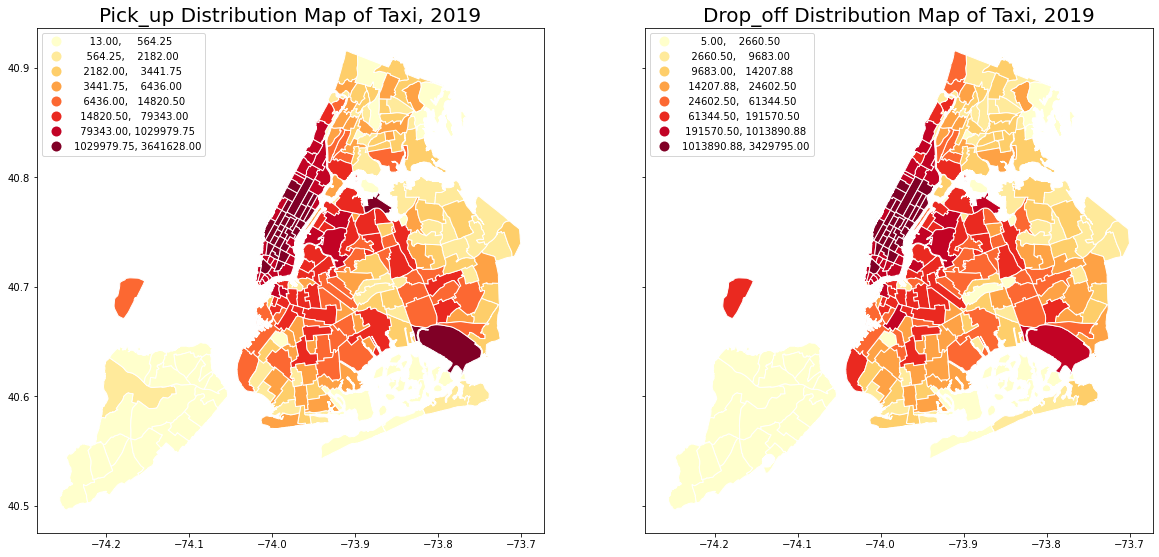

In [118]:
fig, (ax1, ax2) = pyplot.subplots(ncols=2, figsize = (20,10), sharex=True, sharey=True)
ax1.set_title('Pick_up Distribution Map of Taxi, 2019', fontsize = 20)
yellow_zone_PU.plot(ax=ax1, column='N_trips', k=8, scheme='Quantiles', legend=True, cmap='YlOrRd',
                edgecolor='white', linewidth=1, legend_kwds={'loc': 'upper left'})
# poi_g.plot(ax=ax1, marker='*', color = 'black',markersize=100, legend=True)

ax2.set_title('Drop_off Distribution Map of Taxi, 2019', fontsize = 20)
yellow_zone_DO.plot(ax=ax2, column='N_trips', k=8, scheme='Quantiles', legend=True, cmap='YlOrRd',
                edgecolor='white', linewidth=1, legend_kwds={'loc': 'upper left'})
# poi_g.plot(ax=ax2, marker='*', color = 'black',markersize=100, legend=True)

<AxesSubplot:title={'center':'Drop_off Density Map of Taxi, 2019'}>

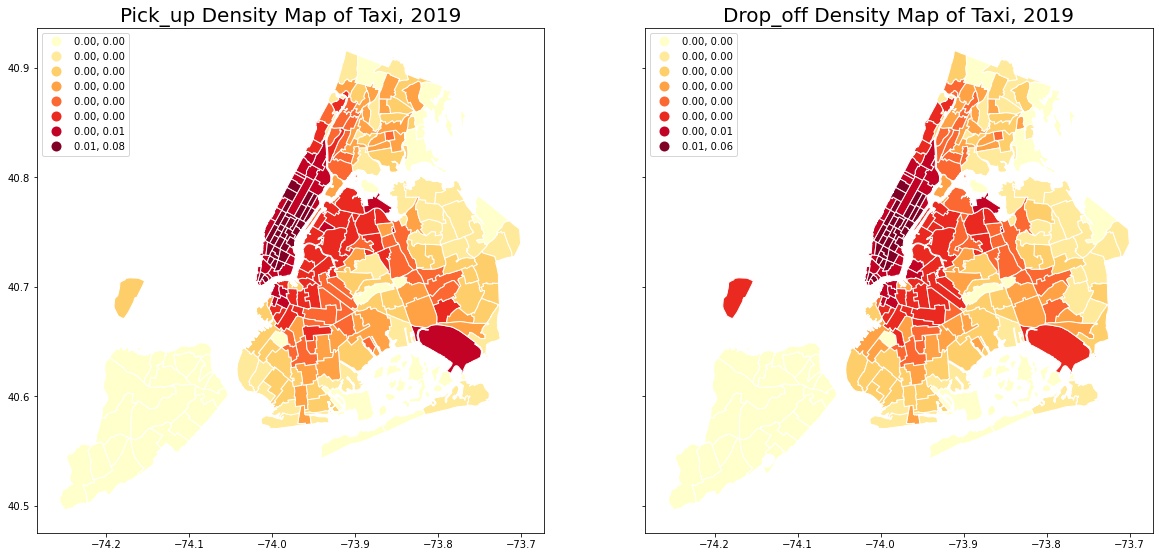

In [119]:
fig, (ax1, ax2) = pyplot.subplots(ncols=2, figsize = (20,10), sharex=True, sharey=True)
ax1.set_title('Pick_up Density Map of Taxi, 2019', fontsize = 20)
yellow_zone_PU.plot(ax=ax1, column='ActivityDensity', k=8, scheme='Quantiles', legend=True, cmap='YlOrRd',
                edgecolor='white', linewidth=1, legend_kwds={'loc': 'upper left'})
# poi_g.plot(ax=ax1, marker='*', color = 'black',markersize=100, legend=True)

ax2.set_title('Drop_off Density Map of Taxi, 2019', fontsize = 20)
yellow_zone_DO.plot(ax=ax2, column='ActivityDensity', k=8, scheme='Quantiles', legend=True, cmap='YlOrRd',
                edgecolor='white', linewidth=1, legend_kwds={'loc': 'upper left'})
# poi_g.plot(ax=ax2, marker='*', color = 'black',markersize=100, legend=True)

Similar to Uber ridership, the pick-up and drop-off density map looks almost similar. The EWR airport ridership for yellow taxi looks less suspicious as compared to Uber data.

In [120]:
yellow_EWR_PU = yellow_2019[(yellow_2019.PULocationID == 1)]

In [121]:
yellow_EWR_PUDO_dis = yellow_EWR_PU.groupby(['PULocationID','DOLocationID']).agg({'hour':'count','trip_duration':'mean'})

In [122]:
yellow_EWR_PUDO_dis

hour  trip_duration
PULocationID DOLocationID                     
1.0          1.0           7020       3.395988
             4.0              1      34.466667
             6.0              1       0.433333
             13.0             1      37.000000
             16.0             1      99.650000
...                         ...            ...
             252.0            1      57.350000
             261.0            3      43.361111
             263.0            2      50.050000
             264.0         1341       1.794780
             265.0          103      34.999353

[66 rows x 2 columns]

In [123]:
yellow_EWR_PUDO_dis = yellow_EWR_PUDO_dis.reset_index()
yellow_EWR_PUDO_dis.rename(columns={'hour':'N_trips'}, inplace=True)

In [124]:
yellow_EWR_PUDO_disg = taxi_zone.merge(yellow_EWR_PUDO_dis, left_on = 'LocationID', right_on = 'DOLocationID', how = 'left')

In [125]:
yellow_EWR_PUDO_disg

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0           1    0.116357    0.000782           Newark Airport           1   
1           2    0.433470    0.004866              Jamaica Bay           2   
2           3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3           4    0.043567    0.000112            Alphabet City           4   
4           5    0.092146    0.000498            Arden Heights           5   
..        ...         ...         ...                      ...         ...   
258       259    0.126750    0.000395       Woodlawn/Wakefield         259   
259       260    0.133514    0.000422                 Woodside         260   
260       261    0.027120    0.000034       World Trade Center         261   
261       262    0.049064    0.000122           Yorkville East         262   
262       263    0.037017    0.000066           Yorkville West         263   

           borough                                           geometry  \
0              EWR  POLYGON ((-74.18445 40.69500, -74.18449 40.695...   
1           Queens  MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...   
2            Bronx  POLYGON ((-73.84793 40.87134, -73.84725 40.870...   
3        Manhattan  POLYGON ((-73.97177 40.72582, -73.97179 40.725...   
4    Staten Island  POLYGON ((-74.17422 40.56257, -74.17349 40.562...   
..             ...                                                ...   
258          Bronx  POLYGON ((-73.85107 40.91037, -73.85207 40.909...   
259         Queens  POLYGON ((-73.90175 40.76078, -73.90147 40.759...   
260      Manhattan  POLYGON ((-74.01333 40.70503, -74.01327 40.704...   
261      Manhattan  MULTIPOLYGON (((-73.94383 40.78286, -73.94376 ...   
262      Manhattan  POLYGON ((-73.95219 40.77302, -73.95269 40.772...   

     PULocationID  DOLocationID  N_trips  trip_duration  
0             1.0           1.0   7020.0       3.395988  
1             NaN           NaN      NaN            NaN  
2             NaN           NaN      NaN            NaN  
3             1.0           4.0      1.0      34.466667  
4             NaN           NaN      NaN            NaN  
..            ...           ...      ...            ...  
258           NaN           NaN      NaN            NaN  
259           NaN           NaN      NaN            NaN  
260           1.0         261.0      3.0      43.361111  
261           NaN           NaN      NaN            NaN  
262           1.0         263.0      2.0      50.050000  

[263 rows x 11 columns]

In [126]:
yellow_EWR_PUDO_disg = yellow_EWR_PUDO_disg.fillna(0)

Text(0.5, 1.0, 'Drop off location of taxi rides with EWR as origin, 2019')

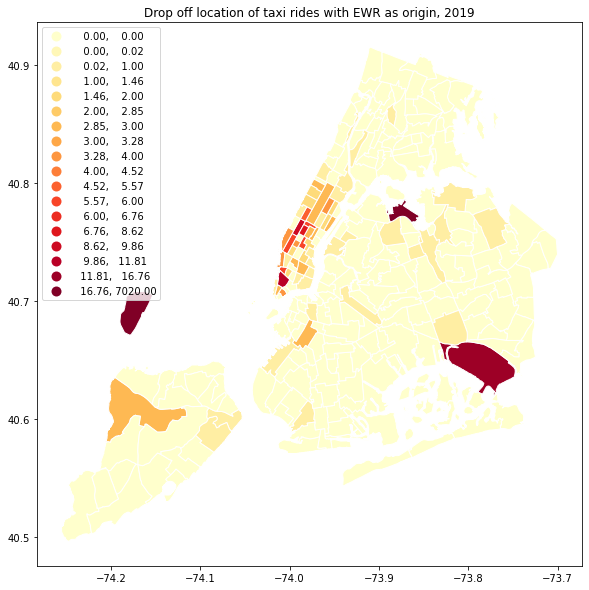

In [127]:
fig, ax = plt.subplots(1, figsize=(10,10)) 
# legend_kwds={'loc': 'best'}
yellow_EWR_PUDO_disg.plot(ax=ax, column='N_trips', k=250, scheme='Quantiles', legend=True, cmap='YlOrRd',
                edgecolor='white', linewidth=1, legend_kwds={'loc': 'upper left'})
plt.title('Drop off location of taxi rides with EWR as origin, 2019', fontsize = 12)

Very few Yellow cabs are available at EWR for picks, because most of the drivers won't be willing to travel so far and absence of any booking platform.

In [128]:
taxi_EWR_DO = yellow_2019[(yellow_2019.DOLocationID == 1)]

In [129]:
taxi_EWR_DOPU_dis = taxi_EWR_DO.groupby(['DOLocationID','PULocationID']).agg({'hour':'count','trip_duration':'mean'}).reset_index()

In [130]:
taxi_EWR_DOPU_dis.rename(columns={'hour':'N_trips'}, inplace=True)

In [131]:
taxi_EWR_DOPU_dis = taxi_zone.merge(taxi_EWR_DOPU_dis, left_on = 'LocationID', right_on = 'PULocationID', how = 'left')

In [132]:
taxi_EWR_DOPU_dis = taxi_EWR_DOPU_dis.fillna(0)

Text(0.5, 1.0, 'Pick up location of taxi rides with EWR as destination, 2019')

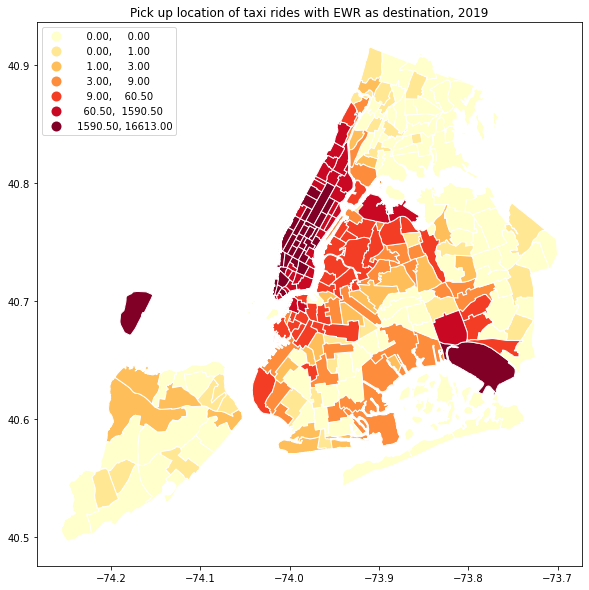

In [133]:
fig, ax = plt.subplots(1, figsize=(10,10)) 

taxi_EWR_DOPU_dis.plot(ax=ax, column='N_trips', k=8, scheme='Quantiles', legend=True, cmap='YlOrRd',
                edgecolor='white', linewidth=1, legend_kwds={'loc': 'upper left'})
plt.title('Pick up location of taxi rides with EWR as destination, 2019', fontsize = 12)

Text(0.5, 1.0, 'Pick up location of uber rides with JFK as destination, 2019')

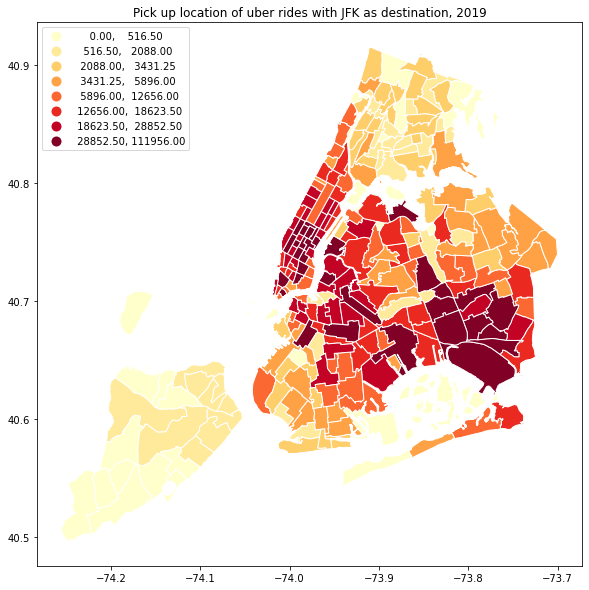

In [134]:
fig, ax = plt.subplots(1, figsize=(10,10)) 

uber_jfk_DOPU_dis.plot(ax=ax, column='N_trips', k=8, scheme='Quantiles', legend=True, cmap='YlOrRd',
                edgecolor='white', linewidth=1, legend_kwds={'loc': 'upper left'})
plt.title('Pick up location of uber rides with JFK as destination, 2019', fontsize = 12)

In [135]:
yellow_EWR_dow = yellow_EWR_PU.groupby(['DOLocationID','DOW']).agg({'hour':'count'}).reset_index()
yellow_EWR_dow.rename(columns = {'hour':'N_trips'}, inplace = True)

In [136]:
yellow_EWR_dow[(yellow_EWR_dow.DOLocationID == 132)]

DOLocationID  DOW  N_trips
54         132.0  1.0        3
55         132.0  2.0        2
56         132.0  3.0        3
57         132.0  4.0        1
58         132.0  5.0        1
59         132.0  6.0        2

In [137]:
yellow_EWR_dow = yellow_EWR_dow[(yellow_EWR_dow.N_trips > 2)]

Text(0.5, 1.0, 'Weekly trip distribution of taxi rides originating from EWR')

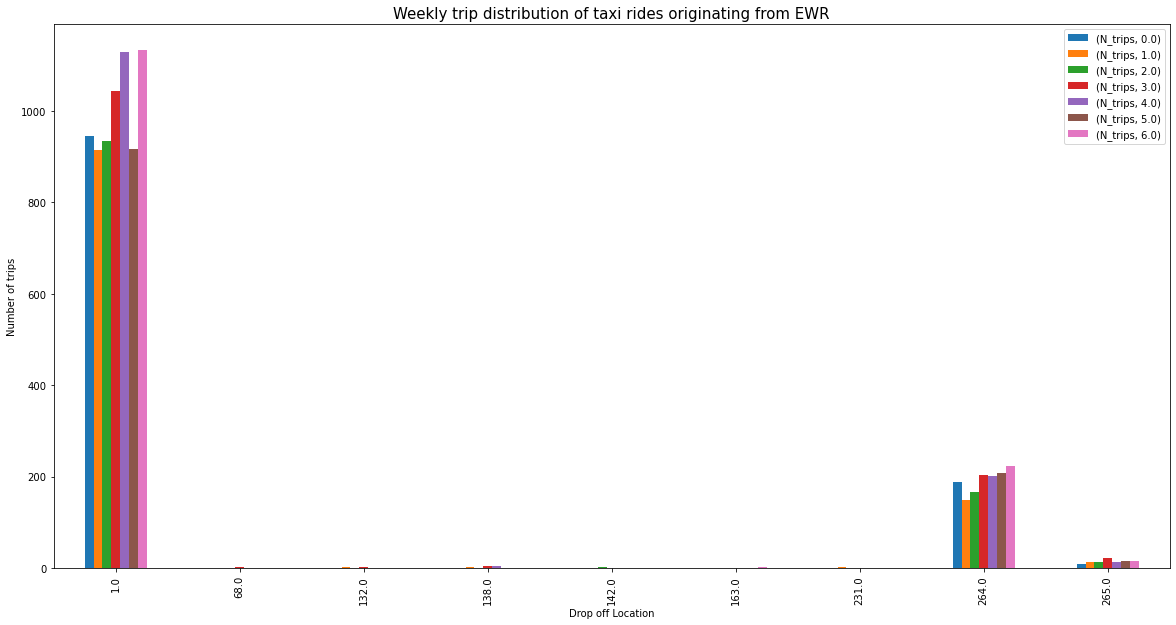

In [138]:
fig, ax = plt.subplots(1, figsize=(20,10)) 
yellow_EWR_dow.pivot(index=['DOLocationID'], columns=['DOW'], values = ['N_trips']).plot(ax=ax, kind='bar')

plt.xlabel('Drop off Location')
plt.ylabel('Number of trips')
plt.legend(loc = 'upper right')
plt.title ('Weekly trip distribution of taxi rides originating from EWR', fontsize = 15)

In [139]:
yellow_JFK_PU = yellow_2019[(yellow_2019.PULocationID == 132)]

In [140]:
yellow_JFK_PU

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
28        2019-01-01 00:08:20   2019-01-01 00:41:51              2.0   
63        2019-01-01 00:35:25   2019-01-01 01:14:21              1.0   
65        2019-01-01 00:04:06   2019-01-01 00:38:55              4.0   
126       2019-01-01 00:39:58   2019-01-01 01:42:57              2.0   
135       2019-01-01 00:11:27   2019-01-01 00:46:29              5.0   
...                       ...                   ...              ...   
84393419  2019-12-29 23:23:00   2019-12-29 23:55:00              NaN   
84393531  2019-12-28 15:25:00   2019-12-28 16:30:00              NaN   
84395286  2019-12-30 10:05:00   2019-12-30 10:08:00              NaN   
84395467  2019-12-30 16:38:00   2019-12-30 17:10:00              NaN   
84397519  2019-12-31 23:19:00   2019-12-31 23:45:00              NaN   

          trip_distance  PULocationID  DOLocationID  total_amount  hour  \
28                19.13         132.0         238.0         70.27   0.0   
63                18.15         132.0         224.0         70.27   0.0   
65                18.10         132.0         224.0         57.80   0.0   
126               20.01         132.0          50.0         58.56   0.0   
135               21.42         132.0          87.0         70.27   0.0   
...                 ...           ...           ...           ...   ...   
84393419          16.92         132.0         233.0         77.97  23.0   
84393531          17.70         132.0         186.0         81.09  15.0   
84395286           1.70         132.0         132.0         71.42  10.0   
84395467          14.00         132.0         226.0         78.96  16.0   
84397519          16.45         132.0          42.0         82.70  23.0   

                date    year  DOW  lpep_pickup_datetime  \
28        2019-01-01  2019.0  1.0                   NaN   
63        2019-01-01  2019.0  1.0                   NaN   
65        2019-01-01  2019.0  1.0                   NaN   
126       2019-01-01  2019.0  1.0                   NaN   
135       2019-01-01  2019.0  1.0                   NaN   
...              ...     ...  ...                   ...   
84393419  2019-12-29  2019.0  6.0                   NaN   
84393531  2019-12-28  2019.0  5.0                   NaN   
84395286  2019-12-30  2019.0  0.0                   NaN   
84395467  2019-12-30  2019.0  0.0                   NaN   
84397519  2019-12-31  2019.0  1.0                   NaN   

          lpep_dropoff_datetime  PU_Month  trip_duration  
28                          NaN         1      33.516667  
63                          NaN         1      38.933333  
65                          NaN         1      34.816667  
126                         NaN         1      62.983333  
135                         NaN         1      35.033333  
...                         ...       ...            ...  
84393419                    NaN        12      32.000000  
84393531                    NaN        12      65.000000  
84395286                    NaN        12       3.000000  
84395467                    NaN        12      32.000000  
84397519                    NaN        12      26.000000  

[2729523 rows x 15 columns]

In [141]:
yellow_JFK_PU.sort_values(by=['total_amount'])

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
62842738  2019-09-28 11:24:37   2019-09-29 04:40:22              1.0   
46479753  2019-07-12 00:33:52   2019-07-12 00:35:14              1.0   
4890195   2019-01-21 12:01:45   2019-01-21 12:08:36              1.0   
76297742  2019-11-24 19:54:43   2019-11-24 19:55:12              1.0   
1204454   2019-01-06 15:06:51   2019-01-06 15:08:58              1.0   
...                       ...                   ...              ...   
17048606  2019-03-09 23:51:50   2019-03-10 04:55:58              2.0   
7975769   2019-02-02 00:37:44   2019-02-02 00:37:52              1.0   
46744452  2019-07-13 10:32:25   2019-07-13 10:34:59              1.0   
27537881  2019-04-20 17:22:25   2019-04-20 17:56:14              1.0   
16738068  2019-03-08 21:50:56   2019-03-08 22:04:20              1.0   

          trip_distance  PULocationID  DOLocationID  total_amount  hour  \
62842738           7.91         132.0          76.0       -530.80  11.0   
46479753           0.00         132.0         264.0       -450.80   0.0   
4890195            0.00         132.0         132.0       -362.80  12.0   
76297742           0.48         132.0         132.0       -350.30  19.0   
1204454            0.75         132.0         132.0       -284.80  15.0   
...                 ...           ...           ...           ...   ...   
17048606         237.17         132.0         265.0       1150.06  23.0   
7975769            0.00         132.0         132.0       1199.16   0.0   
46744452           2.10         132.0          10.0       6667.45  10.0   
27537881          10.80         132.0         225.0       9435.80  17.0   
16738068           7.00         132.0          93.0     171862.92  21.0   

                date    year  DOW  lpep_pickup_datetime  \
62842738  2019-09-28  2019.0  5.0                   NaN   
46479753  2019-07-12  2019.0  4.0                   NaN   
4890195   2019-01-21  2019.0  0.0                   NaN   
76297742  2019-11-24  2019.0  6.0                   NaN   
1204454   2019-01-06  2019.0  6.0                   NaN   
...              ...     ...  ...                   ...   
17048606  2019-03-09  2019.0  5.0                   NaN   
7975769   2019-02-02  2019.0  5.0                   NaN   
46744452  2019-07-13  2019.0  5.0                   NaN   
27537881  2019-04-20  2019.0  5.0                   NaN   
16738068  2019-03-08  2019.0  4.0                   NaN   

          lpep_dropoff_datetime  PU_Month  trip_duration  
62842738                    NaN         9    1035.750000  
46479753                    NaN         7       1.366667  
4890195                     NaN         1       6.850000  
76297742                    NaN        11       0.483333  
1204454                     NaN         1       2.116667  
...                         ...       ...            ...  
17048606                    NaN         3     304.133333  
7975769                     NaN         2       0.133333  
46744452                    NaN         7       2.566667  
27537881                    NaN         4      33.816667  
16738068                    NaN         3      13.400000  

[2729523 rows x 15 columns]

In [142]:
yellow_JFK_PU.describe()

passenger_count  trip_distance  PULocationID  DOLocationID  \
count     2.729280e+06   2.729523e+06     2729523.0  2.729523e+06   
mean      1.593605e+00   1.508551e+01         132.0  1.460746e+02   
std       1.211157e+00   6.554308e+00           0.0  7.450404e+01   
min       0.000000e+00  -1.264000e+01         132.0  1.000000e+00   
25%       1.000000e+00   1.135000e+01         132.0  8.700000e+01   
50%       1.000000e+00   1.727000e+01         132.0  1.450000e+02   
75%       2.000000e+00   1.880000e+01         132.0  2.180000e+02   
max       9.000000e+00   5.430900e+02         132.0  2.650000e+02   

       total_amount          hour       year           DOW  \
count  2.729523e+06  2.729523e+06  2729523.0  2.729523e+06   
mean   5.582373e+01  1.435334e+01     2019.0  2.966645e+00   
std    1.071766e+02  6.293058e+00        0.0  2.041292e+00   
min   -5.308000e+02  0.000000e+00     2019.0  0.000000e+00   
25%    4.030000e+01  1.000000e+01     2019.0  1.000000e+00   
50%    6.142000e+01  1.600000e+01     2019.0  3.000000e+00   
75%    7.142000e+01  1.900000e+01     2019.0  5.000000e+00   
max    1.718629e+05  2.300000e+01     2019.0  6.000000e+00   

       lpep_pickup_datetime  lpep_dropoff_datetime      PU_Month  \
count                   0.0                    0.0  2.729523e+06   
mean                    NaN                    NaN  6.678319e+00   
std                     NaN                    NaN  3.359740e+00   
min                     NaN                    NaN  1.000000e+00   
25%                     NaN                    NaN  4.000000e+00   
50%                     NaN                    NaN  7.000000e+00   
75%                     NaN                    NaN  1.000000e+01   
max                     NaN                    NaN  1.200000e+01   

       trip_duration  
count   2.729523e+06  
mean    4.343849e+01  
std     3.292835e+02  
min    -5.254605e+05  
25%     2.545000e+01  
50%     3.730000e+01  
75%     5.063333e+01  
max     8.590333e+03

In [143]:
yellow_JFK_PU_150 = yellow_JFK_PU[(yellow_JFK_PU.total_amount > 150)]

In [144]:
yellow_JFK_PU_150

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4025      2019-01-01 00:13:17   2019-01-01 01:06:13              1.0   
9256      2019-01-01 00:21:28   2019-01-01 01:07:40              1.0   
39439     2019-01-01 02:14:04   2019-01-01 03:06:53              1.0   
67744     2019-01-01 07:31:47   2019-01-01 08:27:41              1.0   
70845     2019-01-01 08:43:32   2019-01-01 09:28:36              1.0   
...                       ...                   ...              ...   
84330068  2019-12-31 21:57:46   2019-12-31 22:43:27              2.0   
84338884  2019-12-31 22:47:19   2019-12-31 23:28:39              1.0   
84339053  2019-12-31 22:50:01   2019-12-31 23:36:27              1.0   
84342998  2019-12-31 23:39:56   2020-01-01 00:33:38              2.0   
84369544  2019-12-15 18:41:00   2019-12-15 19:37:00              NaN   

          trip_distance  PULocationID  DOLocationID  total_amount  hour  \
4025              44.10         132.0         265.0        150.30   0.0   
9256              27.60         132.0         265.0        150.80   0.0   
39439             40.62         132.0         265.0        173.06   2.0   
67744             45.15         132.0         265.0        257.32   7.0   
70845             38.70         132.0         265.0        207.30   8.0   
...                 ...           ...           ...           ...   ...   
84330068          24.70         132.0         265.0        180.80  21.0   
84338884          33.19         132.0         265.0        181.36  22.0   
84339053          39.06         132.0         265.0        248.30  22.0   
84342998          42.75         132.0           1.0        176.90  23.0   
84369544          30.20         132.0         265.0        163.07  18.0   

                date    year  DOW  lpep_pickup_datetime  \
4025      2019-01-01  2019.0  1.0                   NaN   
9256      2019-01-01  2019.0  1.0                   NaN   
39439     2019-01-01  2019.0  1.0                   NaN   
67744     2019-01-01  2019.0  1.0                   NaN   
70845     2019-01-01  2019.0  1.0                   NaN   
...              ...     ...  ...                   ...   
84330068  2019-12-31  2019.0  1.0                   NaN   
84338884  2019-12-31  2019.0  1.0                   NaN   
84339053  2019-12-31  2019.0  1.0                   NaN   
84342998  2019-12-31  2019.0  1.0                   NaN   
84369544  2019-12-15  2019.0  6.0                   NaN   

          lpep_dropoff_datetime  PU_Month  trip_duration  
4025                        NaN         1      52.933333  
9256                        NaN         1      46.200000  
39439                       NaN         1      52.816667  
67744                       NaN         1      55.900000  
70845                       NaN         1      45.066667  
...                         ...       ...            ...  
84330068                    NaN        12      45.683333  
84338884                    NaN        12      41.333333  
84339053                    NaN        12      46.433333  
84342998                    NaN        12      53.700000  
84369544                    NaN        12      56.000000  

[15273 rows x 15 columns]

In [145]:
yellow_JFK_PU_price150 = yellow_JFK_PU_150.groupby(['DOLocationID']).agg({'total_amount':'mean'}).reset_index()

In [146]:
yellow_JFK_PU_price150

DOLocationID  total_amount
0             1.0    172.909576
1             6.0    179.206667
2             7.0    160.060000
3            10.0   1003.528750
4            11.0    366.800000
..            ...           ...
126         259.0    159.780000
127         262.0    151.420000
128         263.0    187.950000
129         264.0    227.356916
130         265.0    205.708894

[131 rows x 2 columns]

In [147]:
yellow_JFK_PU_price150 = taxi_zone.merge(yellow_JFK_PU_price150, left_on = 'LocationID', right_on = 'DOLocationID', how = 'left')

In [148]:
yellow_JFK_PU_price150

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0           1    0.116357    0.000782           Newark Airport           1   
1           2    0.433470    0.004866              Jamaica Bay           2   
2           3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3           4    0.043567    0.000112            Alphabet City           4   
4           5    0.092146    0.000498            Arden Heights           5   
..        ...         ...         ...                      ...         ...   
258       259    0.126750    0.000395       Woodlawn/Wakefield         259   
259       260    0.133514    0.000422                 Woodside         260   
260       261    0.027120    0.000034       World Trade Center         261   
261       262    0.049064    0.000122           Yorkville East         262   
262       263    0.037017    0.000066           Yorkville West         263   

           borough                                           geometry  \
0              EWR  POLYGON ((-74.18445 40.69500, -74.18449 40.695...   
1           Queens  MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...   
2            Bronx  POLYGON ((-73.84793 40.87134, -73.84725 40.870...   
3        Manhattan  POLYGON ((-73.97177 40.72582, -73.97179 40.725...   
4    Staten Island  POLYGON ((-74.17422 40.56257, -74.17349 40.562...   
..             ...                                                ...   
258          Bronx  POLYGON ((-73.85107 40.91037, -73.85207 40.909...   
259         Queens  POLYGON ((-73.90175 40.76078, -73.90147 40.759...   
260      Manhattan  POLYGON ((-74.01333 40.70503, -74.01327 40.704...   
261      Manhattan  MULTIPOLYGON (((-73.94383 40.78286, -73.94376 ...   
262      Manhattan  POLYGON ((-73.95219 40.77302, -73.95269 40.772...   

     DOLocationID  total_amount  
0             1.0    172.909576  
1             NaN           NaN  
2             NaN           NaN  
3             NaN           NaN  
4             NaN           NaN  
..            ...           ...  
258         259.0    159.780000  
259           NaN           NaN  
260           NaN           NaN  
261         262.0    151.420000  
262         263.0    187.950000  

[263 rows x 9 columns]

In [149]:
yellow_JFK_PU_price150 = yellow_JFK_PU_price150.fillna(0)

In [150]:
yellow_JFK_PU_price150

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0           1    0.116357    0.000782           Newark Airport           1   
1           2    0.433470    0.004866              Jamaica Bay           2   
2           3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3           4    0.043567    0.000112            Alphabet City           4   
4           5    0.092146    0.000498            Arden Heights           5   
..        ...         ...         ...                      ...         ...   
258       259    0.126750    0.000395       Woodlawn/Wakefield         259   
259       260    0.133514    0.000422                 Woodside         260   
260       261    0.027120    0.000034       World Trade Center         261   
261       262    0.049064    0.000122           Yorkville East         262   
262       263    0.037017    0.000066           Yorkville West         263   

           borough                                           geometry  \
0              EWR  POLYGON ((-74.18445 40.69500, -74.18449 40.695...   
1           Queens  MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...   
2            Bronx  POLYGON ((-73.84793 40.87134, -73.84725 40.870...   
3        Manhattan  POLYGON ((-73.97177 40.72582, -73.97179 40.725...   
4    Staten Island  POLYGON ((-74.17422 40.56257, -74.17349 40.562...   
..             ...                                                ...   
258          Bronx  POLYGON ((-73.85107 40.91037, -73.85207 40.909...   
259         Queens  POLYGON ((-73.90175 40.76078, -73.90147 40.759...   
260      Manhattan  POLYGON ((-74.01333 40.70503, -74.01327 40.704...   
261      Manhattan  MULTIPOLYGON (((-73.94383 40.78286, -73.94376 ...   
262      Manhattan  POLYGON ((-73.95219 40.77302, -73.95269 40.772...   

     DOLocationID  total_amount  
0             1.0    172.909576  
1             0.0      0.000000  
2             0.0      0.000000  
3             0.0      0.000000  
4             0.0      0.000000  
..            ...           ...  
258         259.0    159.780000  
259           0.0      0.000000  
260           0.0      0.000000  
261         262.0    151.420000  
262         263.0    187.950000  

[263 rows x 9 columns]

In [151]:
yellow_JFK_PU_price150 = yellow_JFK_PU_price150[(yellow_JFK_PU_price150.total_amount > 150)]
# yellow_JFK_PU_price1 = yellow_JFK_PU_priceg[(yellow_JFK_PU_priceg.total_amount < 150)]

In [152]:
yellow_JFK_PU_price150

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0           1    0.116357    0.000782           Newark Airport           1   
5           6    0.150491    0.000606  Arrochar/Fort Wadsworth           6   
6           7    0.107417    0.000390                  Astoria           7   
9          10    0.099839    0.000436             Baisley Park          10   
10         11    0.079211    0.000265               Bath Beach          11   
..        ...         ...         ...                      ...         ...   
250       251    0.137711    0.000626              Westerleigh         251   
251       252    0.158004    0.001025               Whitestone         252   
258       259    0.126750    0.000395       Woodlawn/Wakefield         259   
261       262    0.049064    0.000122           Yorkville East         262   
262       263    0.037017    0.000066           Yorkville West         263   

           borough                                           geometry  \
0              EWR  POLYGON ((-74.18445 40.69500, -74.18449 40.695...   
5    Staten Island  POLYGON ((-74.06367 40.60220, -74.06351 40.602...   
6           Queens  POLYGON ((-73.90414 40.76752, -73.90325 40.767...   
9           Queens  POLYGON ((-73.78327 40.68999, -73.78234 40.688...   
10        Brooklyn  POLYGON ((-74.00110 40.60303, -74.00032 40.602...   
..             ...                                                ...   
250  Staten Island  POLYGON ((-74.13107 40.63115, -74.13059 40.630...   
251         Queens  POLYGON ((-73.82050 40.80101, -73.82040 40.800...   
258          Bronx  POLYGON ((-73.85107 40.91037, -73.85207 40.909...   
261      Manhattan  MULTIPOLYGON (((-73.94383 40.78286, -73.94376 ...   
262      Manhattan  POLYGON ((-73.95219 40.77302, -73.95269 40.772...   

     DOLocationID  total_amount  
0             1.0    172.909576  
5             6.0    179.206667  
6             7.0    160.060000  
9            10.0   1003.528750  
10           11.0    366.800000  
..            ...           ...  
250         251.0    170.820000  
251         252.0    216.575000  
258         259.0    159.780000  
261         262.0    151.420000  
262         263.0    187.950000  

[129 rows x 9 columns]

Text(0.5, 1.0, 'Highest trip fares for Taxi rides')

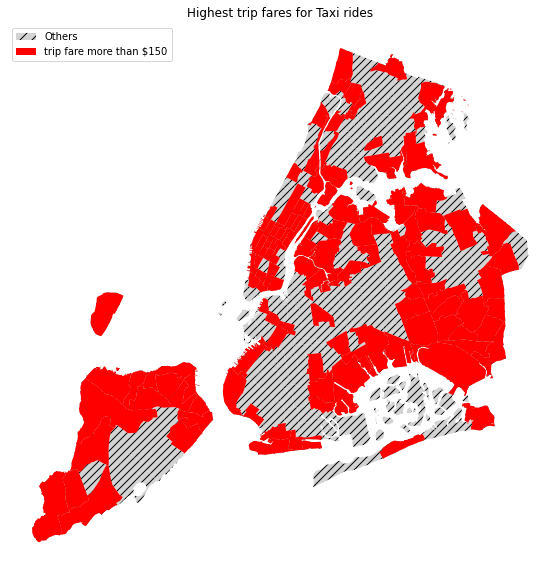

In [153]:
import matplotlib.patches as mpatches
fig,ax = plt.subplots(figsize=(10,10))
taxi_zone.plot(facecolor='lightgrey',hatch='///',ax=ax)
yellow_JFK_PU_price150.plot(facecolor='red',ax=ax)
# yellow_JFK_PU_price1.plot(facecolor='green',ax=ax)

#visualizing highest and lowest 10 travel density as per pick up location ID

LegendElement = [
                mpatches.Patch(facecolor='lightgrey', hatch='//', label='Others'),
                mpatches.Patch(facecolor='red', label='trip fare more than $150'),
#                 mpatches.Patch(facecolor='green', label='trip fare less than $150')
                ]
ax.legend(handles = LegendElement, loc='upper left')
ax.axis('off')
ax.set_title ('Highest trip fares for Taxi rides', fontsize = 12)

In [154]:
yellow_JFK_PU_175 = yellow_JFK_PU[(yellow_JFK_PU.total_amount <= 175)]

In [155]:
yellow_JFK_PU_175

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
28        2019-01-01 00:08:20   2019-01-01 00:41:51              2.0   
63        2019-01-01 00:35:25   2019-01-01 01:14:21              1.0   
65        2019-01-01 00:04:06   2019-01-01 00:38:55              4.0   
126       2019-01-01 00:39:58   2019-01-01 01:42:57              2.0   
135       2019-01-01 00:11:27   2019-01-01 00:46:29              5.0   
...                       ...                   ...              ...   
84393419  2019-12-29 23:23:00   2019-12-29 23:55:00              NaN   
84393531  2019-12-28 15:25:00   2019-12-28 16:30:00              NaN   
84395286  2019-12-30 10:05:00   2019-12-30 10:08:00              NaN   
84395467  2019-12-30 16:38:00   2019-12-30 17:10:00              NaN   
84397519  2019-12-31 23:19:00   2019-12-31 23:45:00              NaN   

          trip_distance  PULocationID  DOLocationID  total_amount  hour  \
28                19.13         132.0         238.0         70.27   0.0   
63                18.15         132.0         224.0         70.27   0.0   
65                18.10         132.0         224.0         57.80   0.0   
126               20.01         132.0          50.0         58.56   0.0   
135               21.42         132.0          87.0         70.27   0.0   
...                 ...           ...           ...           ...   ...   
84393419          16.92         132.0         233.0         77.97  23.0   
84393531          17.70         132.0         186.0         81.09  15.0   
84395286           1.70         132.0         132.0         71.42  10.0   
84395467          14.00         132.0         226.0         78.96  16.0   
84397519          16.45         132.0          42.0         82.70  23.0   

                date    year  DOW  lpep_pickup_datetime  \
28        2019-01-01  2019.0  1.0                   NaN   
63        2019-01-01  2019.0  1.0                   NaN   
65        2019-01-01  2019.0  1.0                   NaN   
126       2019-01-01  2019.0  1.0                   NaN   
135       2019-01-01  2019.0  1.0                   NaN   
...              ...     ...  ...                   ...   
84393419  2019-12-29  2019.0  6.0                   NaN   
84393531  2019-12-28  2019.0  5.0                   NaN   
84395286  2019-12-30  2019.0  0.0                   NaN   
84395467  2019-12-30  2019.0  0.0                   NaN   
84397519  2019-12-31  2019.0  1.0                   NaN   

          lpep_dropoff_datetime  PU_Month  trip_duration  
28                          NaN         1      33.516667  
63                          NaN         1      38.933333  
65                          NaN         1      34.816667  
126                         NaN         1      62.983333  
135                         NaN         1      35.033333  
...                         ...       ...            ...  
84393419                    NaN        12      32.000000  
84393531                    NaN        12      65.000000  
84395286                    NaN        12       3.000000  
84395467                    NaN        12      32.000000  
84397519                    NaN        12      26.000000  

[2720857 rows x 15 columns]

In [156]:
yellow_JFK_PU_175h = yellow_JFK_PU_175.groupby(['DOLocationID', 'hour']).agg({'total_amount':'mean'}).reset_index()

In [157]:
# yellow_JFK_PU_175h = yellow_JFK_PU_175h.sort_values(by = 'total_amount')

In [158]:
yellow_JFK_PU_175h_33 = yellow_JFK_PU_175h[(yellow_JFK_PU_175h.DOLocationID == 33)]

In [159]:
yellow_JFK_PU_175h_33

DOLocationID  hour  total_amount
749          33.0   0.0     63.741289
750          33.0   1.0     63.019024
751          33.0   2.0     62.050495
752          33.0   3.0     62.726909
753          33.0   4.0     61.891774
754          33.0   5.0     63.072056
755          33.0   6.0     63.345532
756          33.0   7.0     67.487913
757          33.0   8.0     67.059155
758          33.0   9.0     64.972574
759          33.0  10.0     67.286978
760          33.0  11.0     67.043746
761          33.0  12.0     66.773221
762          33.0  13.0     67.608481
763          33.0  14.0     67.974622
764          33.0  15.0     66.938628
765          33.0  16.0     67.208701
766          33.0  17.0     67.126905
767          33.0  18.0     66.847054
768          33.0  19.0     65.821904
769          33.0  20.0     65.100007
770          33.0  21.0     64.514629
771          33.0  22.0     65.631425
772          33.0  23.0     64.753843

Text(0.5, 1.0, 'Drop-off hourly taxitrip fare distribution of JFK Pick-up rides to Brooklyn Heights')

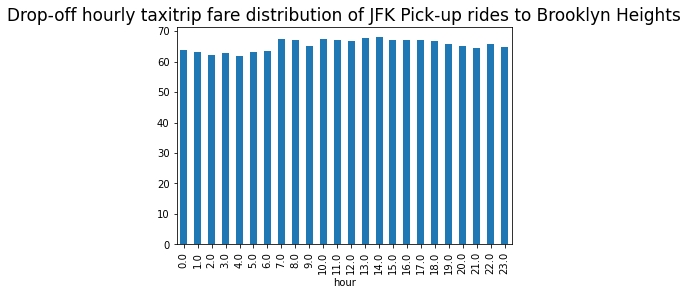

In [160]:
yellow_JFK_PU_175h_33.plot.bar(x='hour', y='total_amount',legend = False)
plt.title('Drop-off hourly taxitrip fare distribution of JFK Pick-up rides to Brooklyn Heights', fontsize=17)

In [161]:
yellow_JFK_PU_175h_230 = yellow_JFK_PU_175h[(yellow_JFK_PU_175h.DOLocationID == 230)]

Text(0.5, 1.0, 'Drop-off hourly taxi trip fare distribution of JFK Pick-up rides to Times Square')

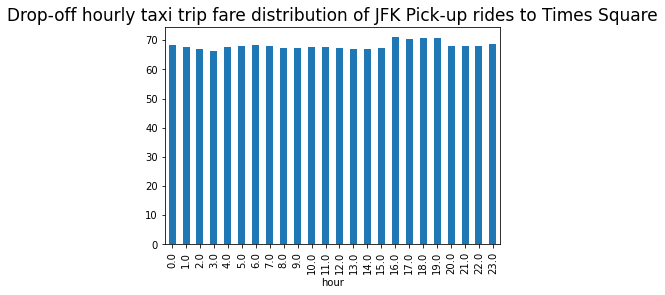

In [162]:
yellow_JFK_PU_175h_230.plot.bar(x='hour', y='total_amount',legend = False)
plt.title('Drop-off hourly taxi trip fare distribution of JFK Pick-up rides to Times Square', fontsize=17)

In [163]:
yellow_JFK_PU_175h_1 = yellow_JFK_PU_175h[(yellow_JFK_PU_175h.DOLocationID == 1)]

Text(0.5, 1.0, 'Drop-off hourly taxi trip fare distribution of JFK Pick-up rides to EWR')

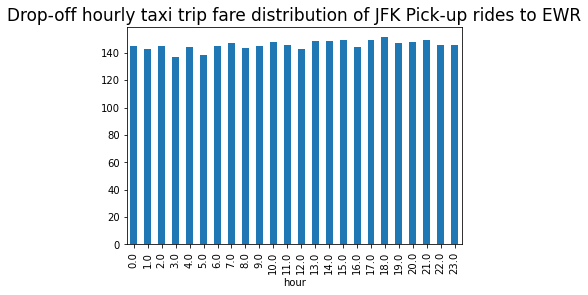

In [164]:
yellow_JFK_PU_175h_1.plot.bar(x='hour', y='total_amount',legend = False)
plt.title('Drop-off hourly taxi trip fare distribution of JFK Pick-up rides to EWR', fontsize=17)

In [165]:
yellow_JFK_PU_175h_115 = yellow_JFK_PU_175h[(yellow_JFK_PU_175h.DOLocationID == 115)]

Text(0.5, 1.0, 'Drop-off hourly taxi trip fare distribution of JFK Pick-up rides to Staten Island')

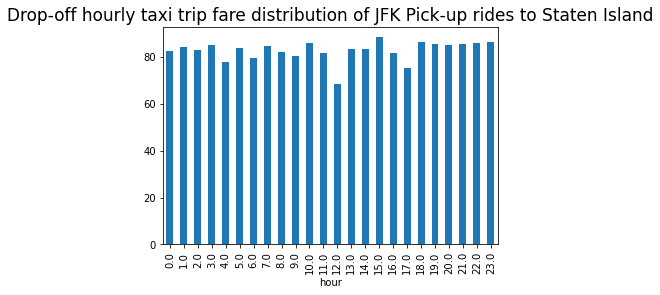

In [166]:
yellow_JFK_PU_175h_115.plot.bar(x='hour', y='total_amount',legend = False)
plt.title('Drop-off hourly taxi trip fare distribution of JFK Pick-up rides to Staten Island', fontsize=17)

In [167]:
yellow_zone_DO[(yellow_zone_DO.DOLocationID == 1)]

OBJECTID  Shape_Leng  Shape_Area            zone  LocationID borough  \
0         1    0.116357    0.000782  Newark Airport           1     EWR   

                                            geometry  DOLocationID  N_trips  \
0  POLYGON ((-74.18445 40.69500, -74.18449 40.695...           1.0   175512   

   ActivityDensity  
0         0.000231

In [168]:
yellow_PU1 = yellow_2019.groupby(['PULocationID','DOLocationID']).agg({'hour':'count','trip_duration':'mean'}).head(10)

In [169]:
yellow_PU1 = yellow_PU1.reset_index()
yellow_PU1.head(20)

PULocationID  DOLocationID  hour  trip_duration
0           1.0           1.0  7020       3.395988
1           1.0           4.0     1      34.466667
2           1.0           6.0     1       0.433333
3           1.0          13.0     1      37.000000
4           1.0          16.0     1      99.650000
5           1.0          20.0     1      40.750000
6           1.0          21.0     1      54.050000
7           1.0          23.0     3      27.916667
8           1.0          37.0     1      47.650000
9           1.0          43.0     3      47.022222

In [170]:
yellow_PU1 = yellow_PU1[(yellow_PU1.PULocationID == 1)]
yellow_PU1.rename(columns={'DOLocationID':'drop-off location ID'}, inplace=True)

In [171]:
yellow_PU1['hour'] = yellow_PU1['hour']/yellow_PU1['hour'].sum()

Text(0.5, 1.0, 'Drop-off location distribution of EWR Pick-up rides')

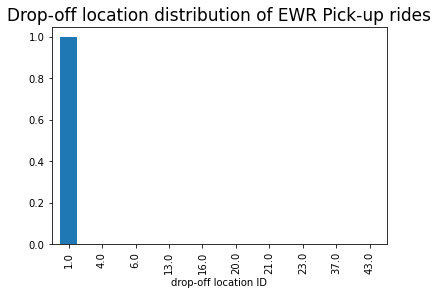

In [172]:
yellow_PU1.plot.bar(x='drop-off location ID', y='hour',legend = False)
plt.title('Drop-off location distribution of EWR Pick-up rides', fontsize=17)

# Temporal Analysis

In [173]:
#Hourly ridership comparison of uber and yellow taxi

In [174]:
uber_hour = uber_2019.groupby(['hour']).agg({'PULocationID':'count'}).reset_index()
uber_hour.rename(columns={'PULocationID':'N_trips'}, inplace=True)

In [175]:
uber_hour.tail()

hour   N_trips
19    19  11035270
20    20  10574476
21    21  10395397
22    22  10097473
23    23   8960326

In [176]:
yellow_hour = yellow_2019.groupby(['hour']).agg({'PULocationID':'count'}).reset_index()
yellow_hour.rename(columns={'PULocationID':'N_trips'}, inplace=True)

In [177]:
yellow_hour.tail()

hour  N_trips
19  19.0  5233193
20  20.0  4776619
21  21.0  4728191
22  22.0  4396438
23  23.0  3477201

The number of hourly ridership od Uber is much higher than yellow taxi. To visualize their hourly pattern in a single plot, normalizing them by the total number of ridership would be more appropriate.

In [178]:
uber_hour['norm_trips'] = uber_hour['N_trips']/ uber_hour['N_trips'].sum()

In [179]:
yellow_hour['norm_trips'] = yellow_hour['N_trips']/ yellow_hour['N_trips'].sum()

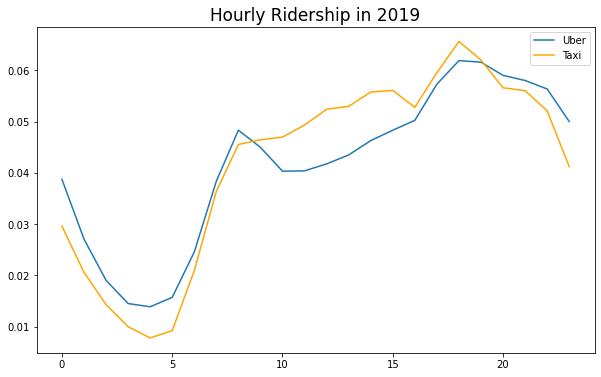

In [180]:
fig = plt.figure(figsize = (10,6))
plt.plot(uber_hour['hour'],uber_hour['norm_trips'], label = 'Uber')

plt.plot(yellow_hour['hour'],yellow_hour['norm_trips'], label = 'Taxi', color = 'Orange')
plt.title('Hourly Ridership in 2019', fontsize=17)
plt.legend()

The hourly ridership pattern of uber and yellow taxi follows a similar pattern, which reaches their pick during 6pm during office rush hours. However, it is visible that the Uber ridership remains more than tha yellow taxi during the night time. App-based and ease of availibity of Uber might the reason for higher ridershipalmost all the time. 

In [181]:
# Daily ridership pattern and their variation throughout the year (4-seasons) of Uben and yellow taxi

In [182]:
uber_daily = uber_2019.groupby(['date']).agg({'PULocationID':'count'}).reset_index()
uber_daily.rename(columns={'PULocationID':'N_trips'}, inplace=True)

In [183]:
uber_daily.head()

date  N_trips
0  2019-01-01   502051
1  2019-01-02   344832
2  2019-01-03   354188
3  2019-01-04   410277
4  2019-01-05   493661

In [184]:
yellow_daily = yellow_2019.groupby(['date']).agg({'PULocationID':'count'}).reset_index()
yellow_daily.rename(columns={'PULocationID':'N_trips'}, inplace=True)

In [185]:
yellow_daily.head()

date  N_trips
0  2019-01-01   189035
1  2019-01-02   197852
2  2019-01-03   222879
3  2019-01-04   235053
4  2019-01-05   236041

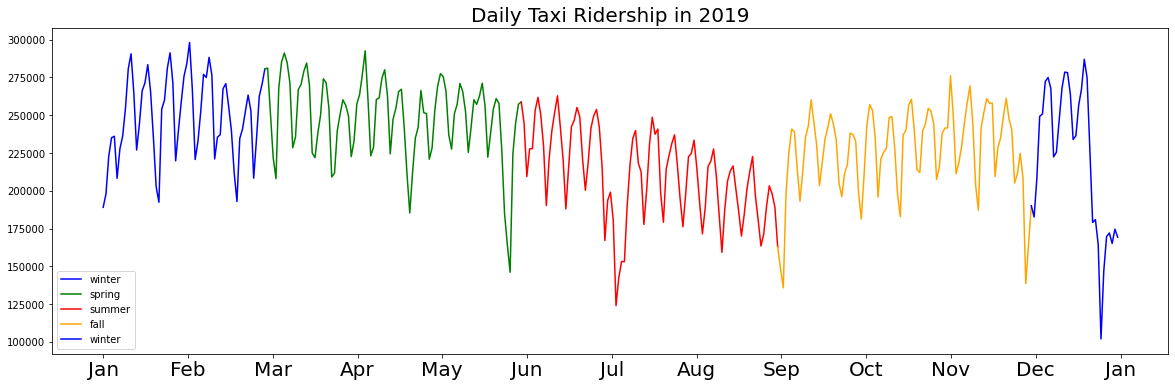

In [186]:
plt.figure(figsize = (20,6))
plt.plot(yellow_daily['date'][:59],yellow_daily['N_trips'][:59],label='winter',color='blue')
plt.plot(yellow_daily['date'][58:151],yellow_daily['N_trips'][58:151],label='spring',color='green') 
plt.plot(yellow_daily['date'][150:243],yellow_daily['N_trips'][150:243],label='summer',color='red')
plt.plot(yellow_daily['date'][242:334],yellow_daily['N_trips'][242:334],label='fall',color='orange')
plt.plot(yellow_daily['date'][333:],yellow_daily['N_trips'][333:],label='winter',color='blue')
# plt.plot(yellow_daily['date'],yellow_daily['N_trips'],alpha = 0.1)
plt.title('Daily Taxi Ridership in 2019', fontsize=20)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan']
plt.xticks(np.linspace(0,365,13), months, fontsize=20)
plt.legend()

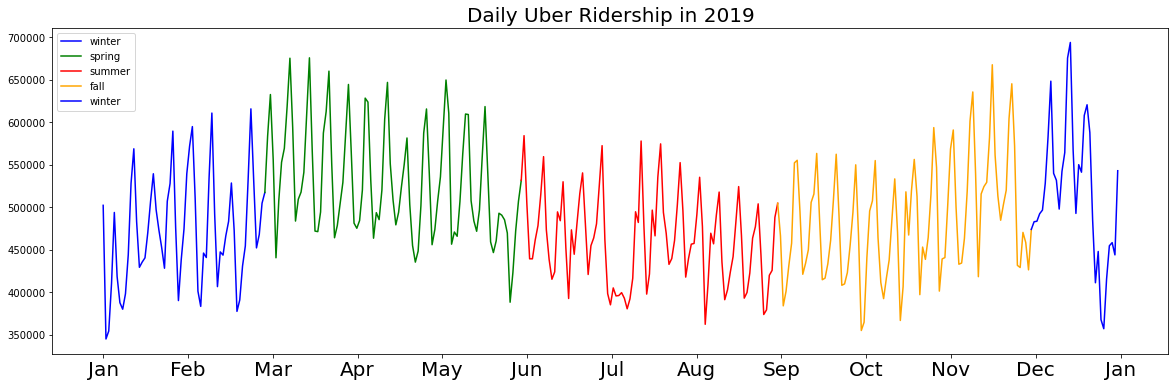

In [187]:
plt.figure(figsize = (20,6))
plt.plot(uber_daily['date'][:59],uber_daily['N_trips'][:59],label='winter',color='blue')
plt.plot(uber_daily['date'][58:151],uber_daily['N_trips'][58:151],label='spring',color='green') 
plt.plot(uber_daily['date'][150:243],uber_daily['N_trips'][150:243],label='summer',color='red')
plt.plot(uber_daily['date'][242:334],uber_daily['N_trips'][242:334],label='fall',color='orange')
plt.plot(uber_daily['date'][333:],uber_daily['N_trips'][333:],label='winter',color='blue') 
plt.title('Daily Uber Ridership in 2019', fontsize=20)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan']
plt.xticks(np.linspace(0,365,13), months, fontsize=20)
plt.legend()

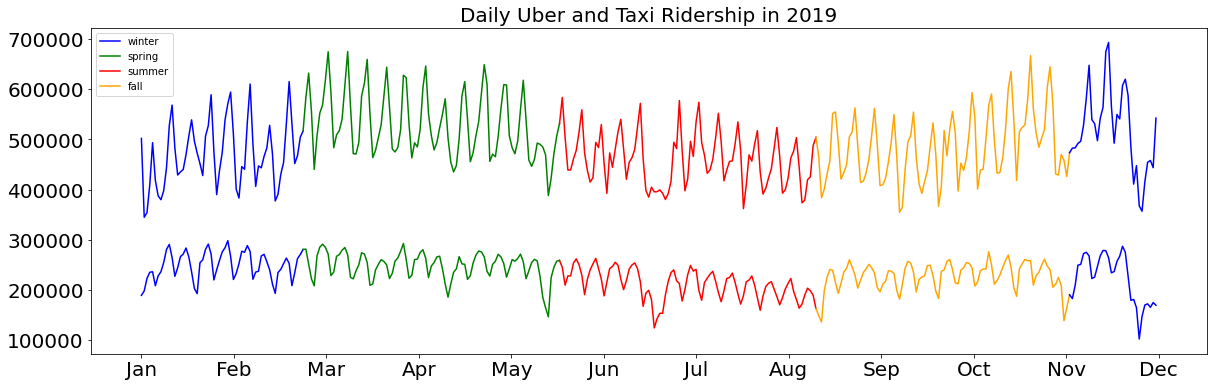

In [188]:
plt.figure(figsize = (20,6))
plt.plot(yellow_daily['date'][:59],yellow_daily['N_trips'][:59],label='winter',color='blue')
plt.plot(yellow_daily['date'][58:151],yellow_daily['N_trips'][58:151],label='spring',color='green') 
plt.plot(yellow_daily['date'][150:243],yellow_daily['N_trips'][150:243],label='summer',color='red')
plt.plot(yellow_daily['date'][242:334],yellow_daily['N_trips'][242:334],label='fall',color='orange')
plt.legend()
plt.plot(yellow_daily['date'][333:],yellow_daily['N_trips'][333:],color='blue')

plt.plot(uber_daily['date'][:59],uber_daily['N_trips'][:59],color='blue')
plt.plot(uber_daily['date'][58:151],uber_daily['N_trips'][58:151],color='green') 
plt.plot(uber_daily['date'][150:243],uber_daily['N_trips'][150:243],color='red')
plt.plot(uber_daily['date'][242:334],uber_daily['N_trips'][242:334],color='orange')
plt.plot(uber_daily['date'][333:],uber_daily['N_trips'][333:],color='blue') 
# plt.plot(yellow_daily['date'],yellow_daily['N_trips'],alpha = 0.1)
plt.title('Daily Uber and Taxi Ridership in 2019', fontsize=20)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.linspace(0,365,12), months, fontsize=20)
plt.yticks(fontsize=20)
plt.show()

### Income based cab choice pattern

In [215]:
income = pd.read_csv('population_income_2021.csv')

In [216]:
income

ZIP Code       Zip_Name  2021_Median_Home_Value  2021_Income pop_2021
0       11697   Breezy Point                  645581       112776    4,065
1       11694  Rockaway Park                  787210        91921   20,874
2       11693   Far Rockaway                  470386        68147   11,900
3       11692        Arverne                  510705        48438   20,414
4       11691   Far Rockaway                  606105        50199   61,831
..        ...            ...                     ...          ...      ...
184     10004       New York                 1363095       176121    5,329
185     10003       New York                 1353322       121138   56,236
186     10002       New York                  833078        37969   81,600
187     10001       New York                  944937       104283   29,482
188      7002        Bayonne                  354539        68397   67,010

[189 rows x 5 columns]

In [217]:
income = income.groupby('ZIP Code').agg({'2021_Income':'sum'})
income

2021_Income
ZIP Code             
7002            68397
10001          104283
10002           37969
10003          121138
10004          176121
...               ...
11691           50199
11692           48438
11693           68147
11694           91921
11697          112776

[189 rows x 1 columns]

In [218]:
zipcode = gpd.read_file('ZIP_CODE_040114.shp')

In [219]:
zipcode['ZIPCODE'] = zipcode['ZIPCODE'].astype(int)

In [220]:
zipcode = zipcode.to_crs(epsg=4326)

In [221]:
inc_zip = zipcode.merge(income, left_on = 'ZIPCODE', right_on = 'ZIP Code', how = 'inner')

In [222]:
inc_zip.head()

ZIPCODE BLDGZIP   PO_NAME  POPULATION          AREA STATE  COUNTY ST_FIPS  \
0    11436       0   Jamaica     18681.0  2.269930e+07    NY  Queens      36   
1    11213       0  Brooklyn     62426.0  2.963100e+07    NY   Kings      36   
2    11212       0  Brooklyn     83866.0  4.197210e+07    NY   Kings      36   
3    11225       0  Brooklyn     56527.0  2.369863e+07    NY   Kings      36   
4    11218       0  Brooklyn     72280.0  3.686880e+07    NY   Kings      36   

  CTY_FIPS                   URL  SHAPE_AREA  SHAPE_LEN  \
0      081  http://www.usps.com/         0.0        0.0   
1      047  http://www.usps.com/         0.0        0.0   
2      047  http://www.usps.com/         0.0        0.0   
3      047  http://www.usps.com/         0.0        0.0   
4      047  http://www.usps.com/         0.0        0.0   

                                            geometry  2021_Income  
0  POLYGON ((-73.80585 40.68291, -73.80569 40.682...        82376  
1  POLYGON ((-73.93740 40.67973, -73.93487 40.679...        47481  
2  POLYGON ((-73.90294 40.67084, -73.90223 40.668...        29348  
3  POLYGON ((-73.95797 40.67066, -73.95576 40.670...        62950  
4  POLYGON ((-73.97208 40.65060, -73.97192 40.650...        77057

In [223]:
from matplotlib import pyplot

<AxesSubplot:title={'center':'Median Household Income at Zipcode-level'}>

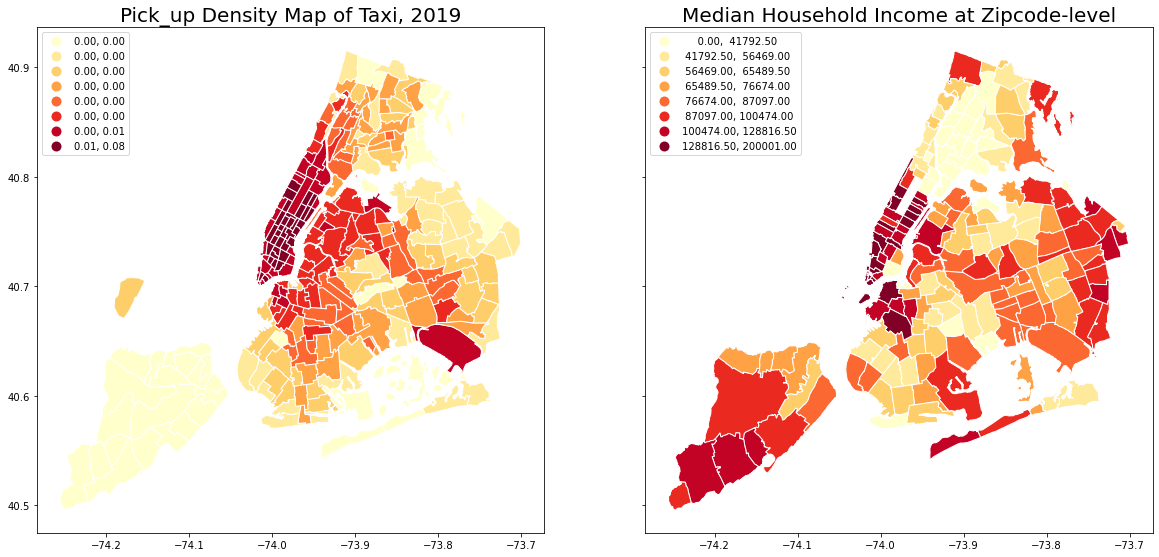

In [224]:
fig, (ax1, ax2) = pyplot.subplots(ncols=2, figsize = (20,10), sharex=True, sharey=True)
ax1.set_title('Pick_up Density Map of Taxi, 2019', fontsize = 20)
yellow_zone_PU.plot(ax=ax1, column='ActivityDensity', k=8, scheme='Quantiles', legend=True, cmap='YlOrRd',
                edgecolor='white', linewidth=1, legend_kwds={'loc': 'upper left'})

ax2.set_title('Median Household Income at Zipcode-level', fontsize = 20)
inc_zip.plot(ax=ax2, column='2021_Income', k=8, scheme='Quantiles', legend=True, cmap='YlOrRd',
                edgecolor='white', linewidth=1, legend_kwds={'loc': 'upper left'})

Text(0.5, 1.0, 'Pick up location of Uber rides with JFK as destination, 2019')

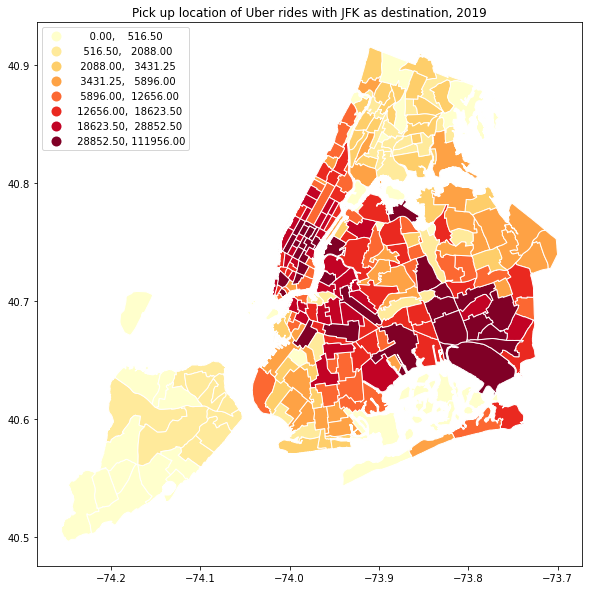

In [225]:
fig, ax = plt.subplots(1, figsize=(10,10)) 

uber_jfk_DOPU_dis.plot(ax=ax, column='N_trips', k=8, scheme='Quantiles', legend=True, cmap='YlOrRd',
                edgecolor='white', linewidth=1, legend_kwds={'loc': 'upper left'})
plt.title('Pick up location of Uber rides with JFK as destination, 2019', fontsize = 12)


<AxesSubplot:title={'center':'Median Household Income at Zipcode-level'}>

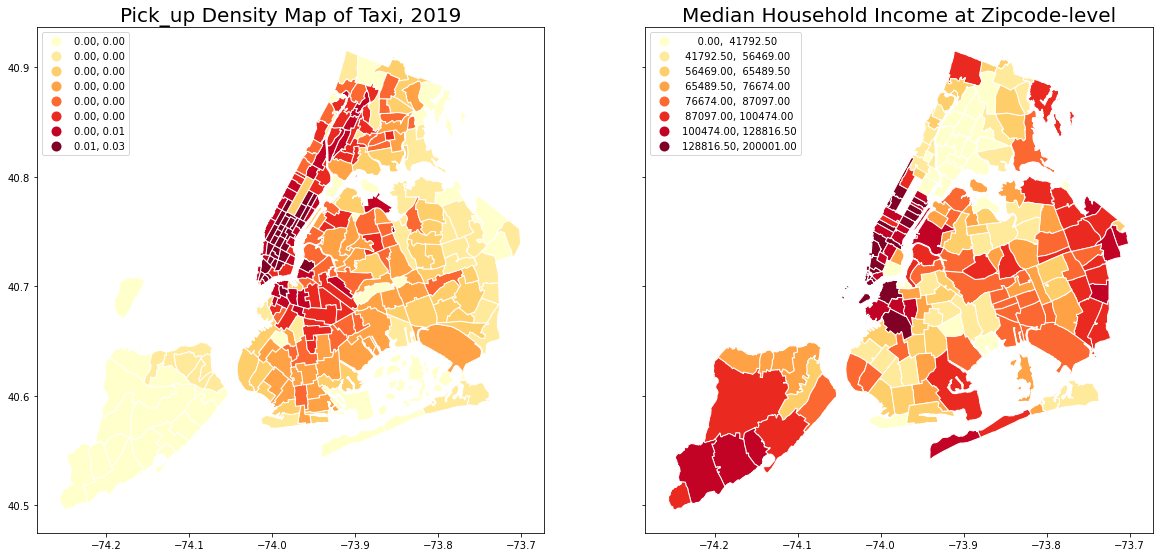

In [226]:
fig, (ax1, ax2) = pyplot.subplots(ncols=2, figsize = (20,10), sharex=True, sharey=True)
ax1.set_title('Pick_up Density Map of Taxi, 2019', fontsize = 20)
uber_zone_PU.plot(ax=ax1, column='ActivityDensity', k=8, scheme='Quantiles', legend=True, cmap='YlOrRd',
                edgecolor='white', linewidth=1, legend_kwds={'loc': 'upper left'})

ax2.set_title('Median Household Income at Zipcode-level', fontsize = 20)
inc_zip.plot(ax=ax2, column='2021_Income', k=8, scheme='Quantiles', legend=True, cmap='YlOrRd',
                edgecolor='white', linewidth=1, legend_kwds={'loc': 'upper left'})

In [227]:
poi = pd.read_csv('POI.csv')

In [228]:
poi

Location        Lat       Long
0      Time Square  40.758896 -73.985130
1     Central Park  40.785091 -73.968285
2              EWR  40.692053 -74.173777
3              JFK  40.641766 -73.780968
4              LGA  40.776927 -73.873966
5   Yankee Stadium  40.829659 -73.926186
6    9/11 Memorial  40.711449 -74.013855
7        Bronx Zoo  40.852905 -73.872971
8   Chelsea Market  40.742352 -74.006210
9           Vessel  40.753800 -74.002200
10    Coney Island  40.574879 -73.982872
11   Prospect Park  40.665535 -73.969749

In [229]:
from shapely.geometry import Point, LineString, Polygon

In [230]:
poi_geometry = [Point(xy) for xy in zip(poi.Long, poi.Lat)]
poi_g = gpd.GeoDataFrame(poi, geometry=poi_geometry)

In [231]:
taxi_zone

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0           1    0.116357    0.000782           Newark Airport           1   
1           2    0.433470    0.004866              Jamaica Bay           2   
2           3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3           4    0.043567    0.000112            Alphabet City           4   
4           5    0.092146    0.000498            Arden Heights           5   
..        ...         ...         ...                      ...         ...   
258       259    0.126750    0.000395       Woodlawn/Wakefield         259   
259       260    0.133514    0.000422                 Woodside         260   
260       261    0.027120    0.000034       World Trade Center         261   
261       262    0.049064    0.000122           Yorkville East         262   
262       263    0.037017    0.000066           Yorkville West         263   

           borough                                           geometry  
0              EWR  POLYGON ((-74.18445 40.69500, -74.18449 40.695...  
1           Queens  MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...  
2            Bronx  POLYGON ((-73.84793 40.87134, -73.84725 40.870...  
3        Manhattan  POLYGON ((-73.97177 40.72582, -73.97179 40.725...  
4    Staten Island  POLYGON ((-74.17422 40.56257, -74.17349 40.562...  
..             ...                                                ...  
258          Bronx  POLYGON ((-73.85107 40.91037, -73.85207 40.909...  
259         Queens  POLYGON ((-73.90175 40.76078, -73.90147 40.759...  
260      Manhattan  POLYGON ((-74.01333 40.70503, -74.01327 40.704...  
261      Manhattan  MULTIPOLYGON (((-73.94383 40.78286, -73.94376 ...  
262      Manhattan  POLYGON ((-73.95219 40.77302, -73.95269 40.772...  

[263 rows x 7 columns]

<AxesSubplot:>

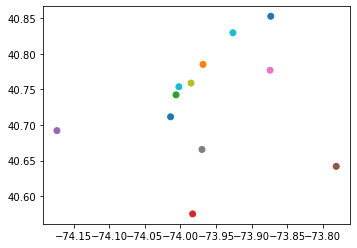

In [232]:
poi_g.plot(column='Location')

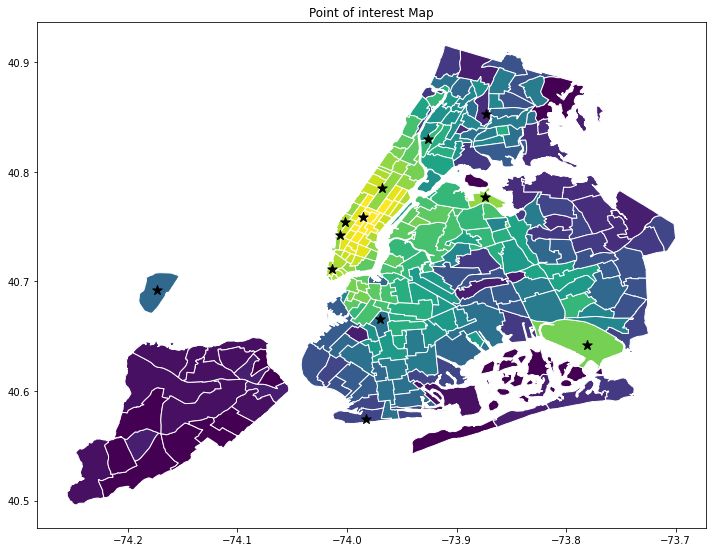

In [233]:
fig, ax = plt.subplots(figsize=(12,12))

# set aspect to equal. This is done automatically
# when using geopandas plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')
# fig, (ax1, ax2) = pyplot.subplots(ncols=2, figsize = (20,10), sharex=True, sharey=True)
# ax1.set_title('Pick_up Density Map of Yellow Taxi, 2019', fontsize = 20)
yellow_zone_PU.plot(ax=ax, column='ActivityDensity', k=25, scheme='Quantiles', legend=False, cmap='viridis',
                edgecolor='white', linewidth=1)
# world.plot(ax=ax, color='white', edgecolor='black')
# taxi_zone.plot("borough",ax=ax, legend=True,figsize=(12,12))
# label = list(poi_g['Location'])
# for i, txt in enumerate(label):
#     ax.annotate(txt, (z[i], y[i]))
poi_g.plot(ax=ax, marker='*', color = 'black',markersize=100, legend=True)
# column = 'Location', 
plt.title("Point of interest Map")
plt.show();